# Analysis of Food Store Accessibility in Erie County, New York
## Erin Gregoire
## Fall 2024

### Exploratory Data Analysis (EDA)

In this step, I will take a deeper dive into the data to explore trends and patterns. 

In [152]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
conn = sqlite3.connect('eriecountydb')
cur = conn.cursor()

### Food Store Amounts
This section details how many food stores are located in each zipcode, including the zipcodes with the most and least number of stores, as well as the average. The graph below shows the order in which Zipcodes have the least to most food stores. Although this section may be a bit difficult to read, especially where the graph's values are challening to read, it is an important first step into seeing which zipcodes may be outliers or may have special needs when it comes to food stores. The next analysis will break down these numbers some more.

#### How many stores are located in each zipcode?

In [156]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    GROUP BY Zipcode
    ORDER BY Number_of_Stores ASC
    """
query1 = pd.read_sql_query(sql_statement, conn)

In [157]:
query1

,Zipcode,Number_of_Stores
0,14026,1
1,14061,1
2,14110,1
3,14134,1
4,14169,1
...,...,...
58,14075,49
59,14207,52
60,14211,52
61,14213,57


#### What zipcodes have the least food stores by volume?

In [159]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        Location.City,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    JOIN Location ON Food_Store.Zipcode = Location.Zipcode
    GROUP BY Location.Zipcode
    HAVING COUNT(Food_Store.Store_Name) <= 3
    ORDER BY Number_of_Stores ASC
    """
query2 = pd.read_sql_query(sql_statement, conn)

In [160]:
query2

,Zipcode,City,Number_of_Stores
0,14026,BOWMANSVILLE,1
1,14061,FARNHAM,1
2,14110,NORTH BOSTON,1
3,14134,SARDINA,1
4,14169,WALES CENTER,1
5,14170,WEST FALLS,1
6,14261,AMHERST,1
7,14030,CHAFFEE,2
8,14033,COLDEN,2
9,14034,COLLINS,2


#### What zipcodes have the most food stores by volume?

In [162]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        Location.City,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    JOIN Location ON Food_Store.Zipcode = Location.Zipcode
    GROUP BY Location.Zipcode
    HAVING COUNT(Food_Store.Store_Name) >= 45
    ORDER BY Number_of_Stores ASC
    """
query3 = pd.read_sql_query(sql_statement, conn)

In [163]:
query3

,Zipcode,City,Number_of_Stores
0,14225,CHEEKTOWAGA,45
1,14221,WILLIAMSVILLE,47
2,14075,HAMBURG,49
3,14207,BUFFALO,52
4,14211,BUFFALO,52
5,14213,BUFFALO,57
6,14215,BUFFALO,57


<Axes: xlabel='Zipcode'>

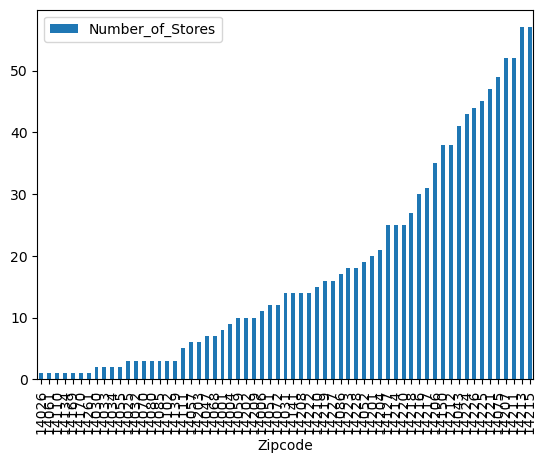

In [164]:
query1.plot.bar(x='Zipcode')

#### What is the average number of food stores per zipcode?

In [166]:
sql_statement = """
    SELECT 
    AVG(Store_Count) AS Average_Stores_Per_Zipcode
FROM (
    SELECT 
        Zipcode, 
        COUNT(Store_ID) AS Store_Count
    FROM 
        Food_Store
    GROUP BY 
        Zipcode
    ) AS ZipcodeStoreCounts;
    """
query4 = pd.read_sql_query(sql_statement, conn)

In [167]:
query4

,Average_Stores_Per_Zipcode
0,17.873016


### Food Store Quality
This section focuses on what the quality of the food stores are in each zipcode. Quality is defined as the number of food stores that contain a certain store focus. It is commonly known that convenience stores typically contain low quality groceries at a high price due to being there for the people's "convenience." Grocery stores with a focus on fresh produce, meats, dairy, and canned/dry foods are seen as higher quality. Specialty stores only carry one type of good, so although that one product may be high quality, it is not a store where you can complete full grocery shopping needs. At pharmacies, the grocery quality is low as well and is often higher priced similar to convenience stores. Lastly, multi-purpose stores such as big-name department stores may have quality groceries but it is not their primary focus.

#### How many stores of each store focus is found in each zipcode?

In [170]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        Food_Store.Store_Focus,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    GROUP BY Zipcode, Store_Focus
    """
query5 = pd.read_sql_query(sql_statement, conn)

In [171]:
query5

,Zipcode,Store_Focus,Number_of_Stores
0,14001,Convenience,2
1,14001,Grocery,1
2,14001,Multi-Purpose,1
3,14001,Pharmacy,1
4,14001,Specialty,3
...,...,...,...
260,14228,Grocery,5
261,14228,Multi-Purpose,2
262,14228,Pharmacy,1
263,14228,Specialty,2


#### How many stores with "Grocery" focus per zipcode?

In [173]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        Location.City,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    JOIN Location ON Food_Store.Zipcode = Location.Zipcode
    WHERE Store_Focus = 'Grocery'
    GROUP BY Food_Store.Zipcode
    """
query6 = pd.read_sql_query(sql_statement, conn)

In [174]:
query6

,Zipcode,City,Number_of_Stores
0,14001,AKRON,1
1,14004,ALDEN,2
2,14006,ANGOLA,2
3,14031,CLARENCE,1
4,14034,COLLINS,1
5,14043,DEPEW,7
6,14047,DERBY,1
7,14051,EAST AMHERST,6
8,14052,EAST AURORA,3
9,14057,EDEN,1


#### How many stores with "Convenience" focus per zipcode?

In [176]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        Location.City,
        COUNT(Food_Store.Store_Name) AS Number_of_Stores
    FROM Food_Store
    JOIN Location ON Food_Store.Zipcode = Location.Zipcode
    WHERE Store_Focus = 'Convenience'
    GROUP BY Food_Store.Zipcode
    """
query7 = pd.read_sql_query(sql_statement, conn)

In [177]:
query7

,Zipcode,City,Number_of_Stores
0,14001,AKRON,2
1,14004,ALDEN,3
2,14006,ANGOLA,6
3,14025,BOSTON,2
4,14026,BOWMANSVILLE,1
5,14031,CLARENCE,7
6,14032,CLARENCE CENTER,1
7,14043,DEPEW,14
8,14047,DERBY,2
9,14051,EAST AMHERST,2


#### What is the breakdown of store focus by location?

In [179]:
sql_statement = """
    SELECT Location.Zipcode
    FROM Location
    """
query_zipcodes = pd.read_sql_query(sql_statement, conn)

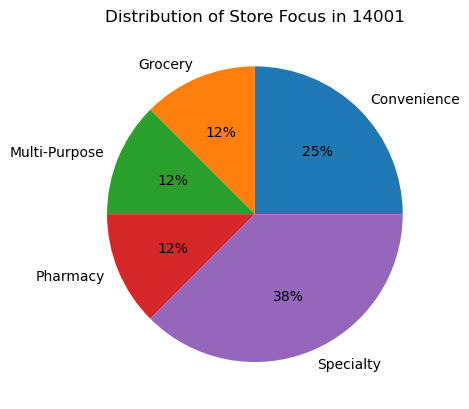

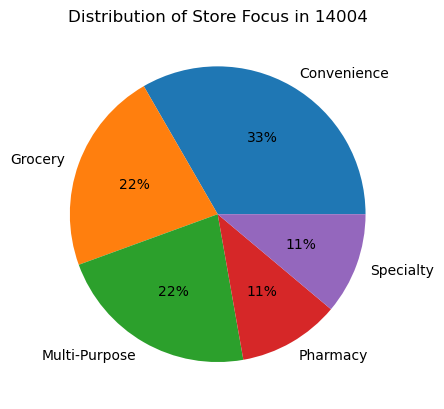

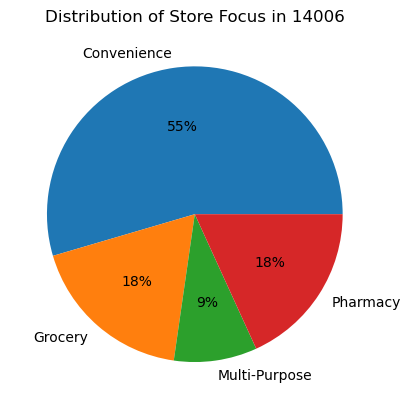

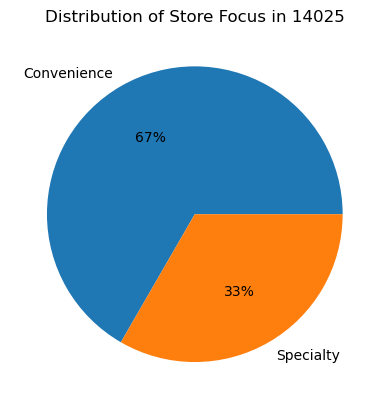

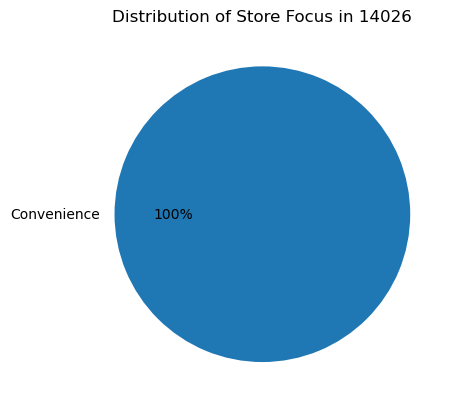

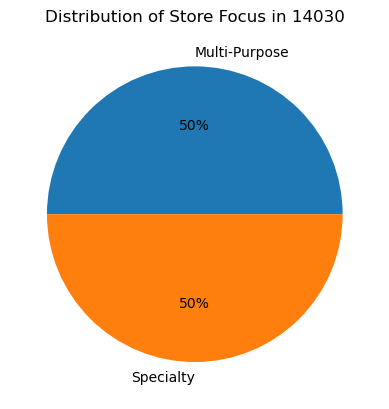

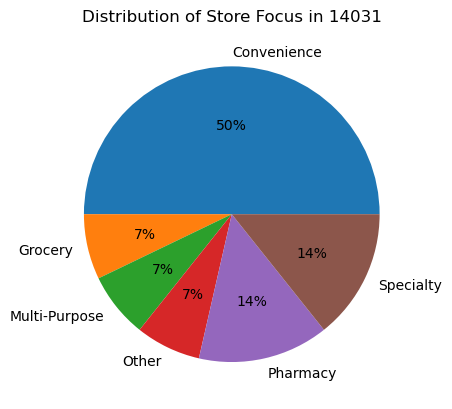

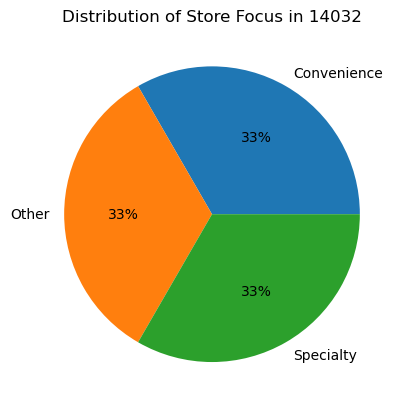

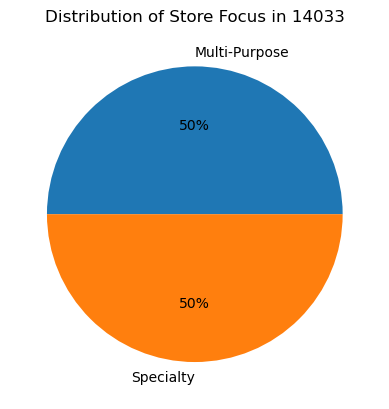

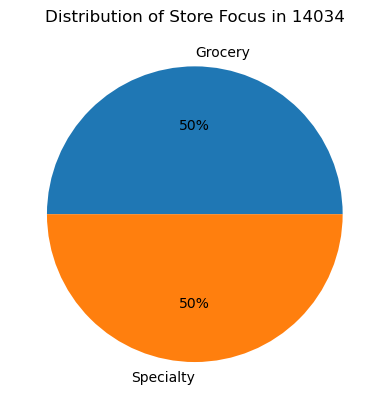

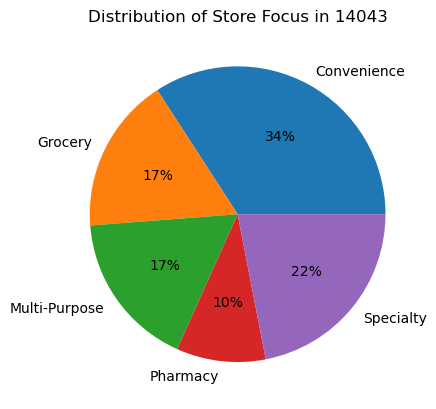

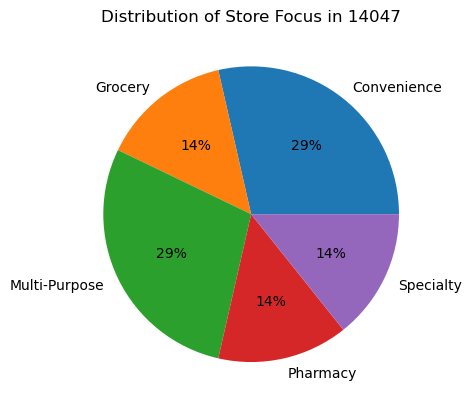

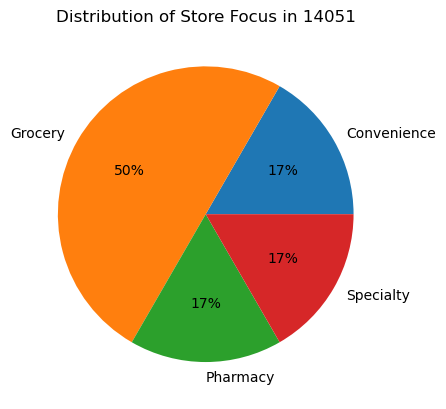

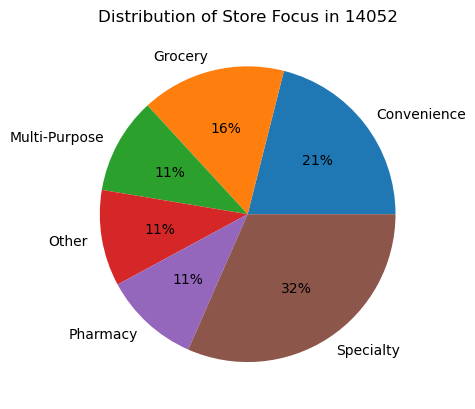

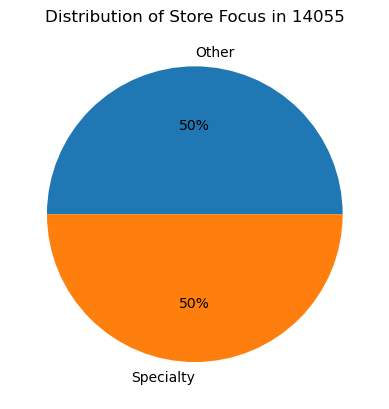

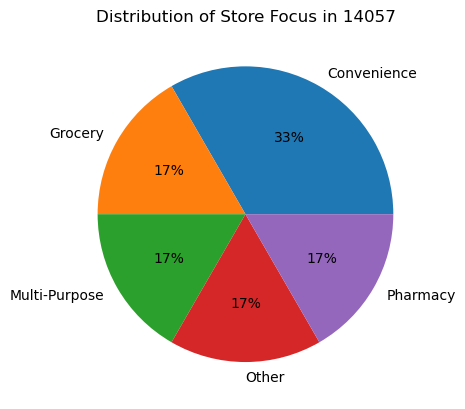

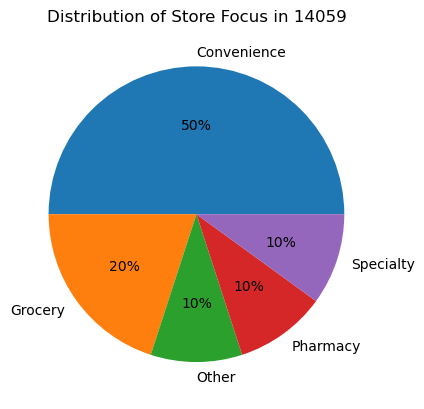

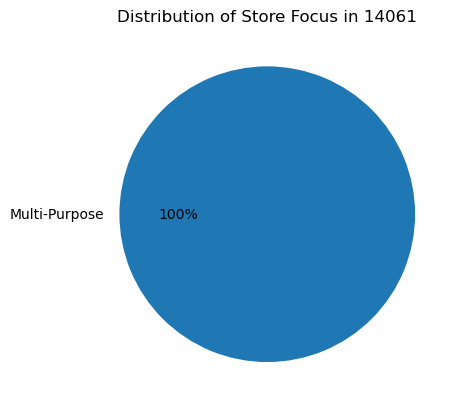

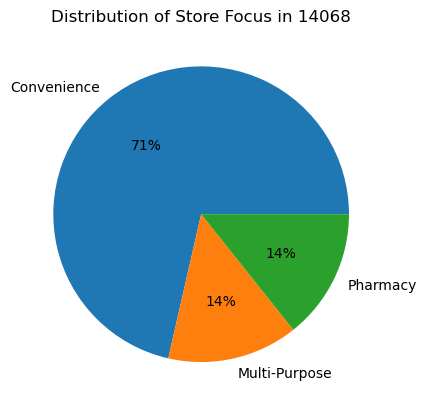

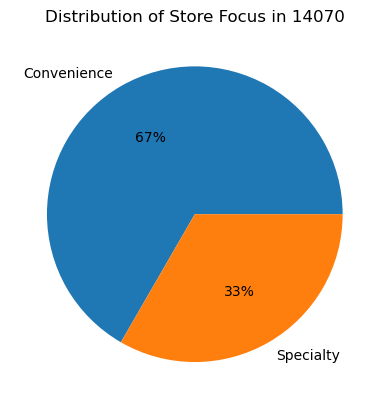

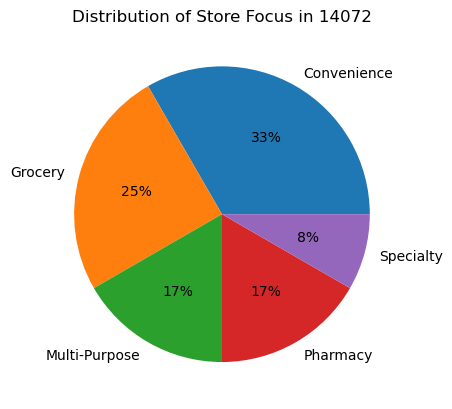

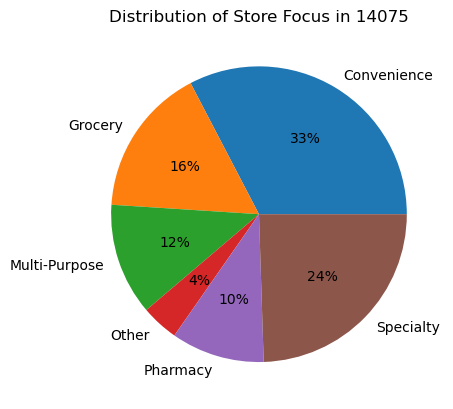

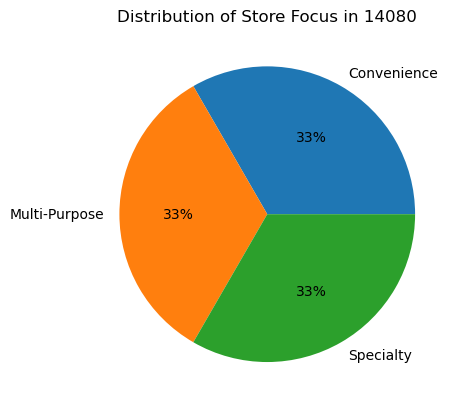

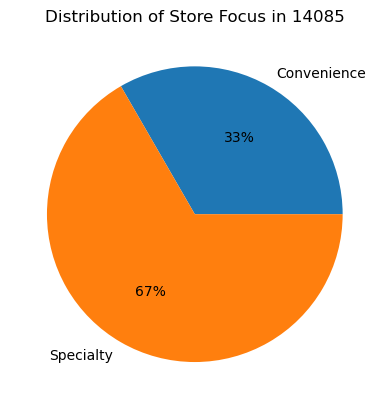

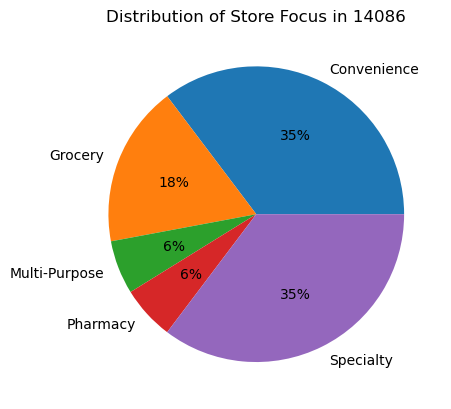

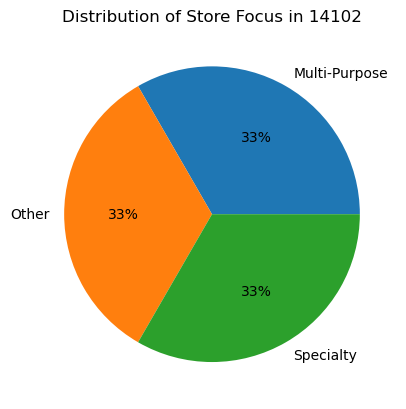

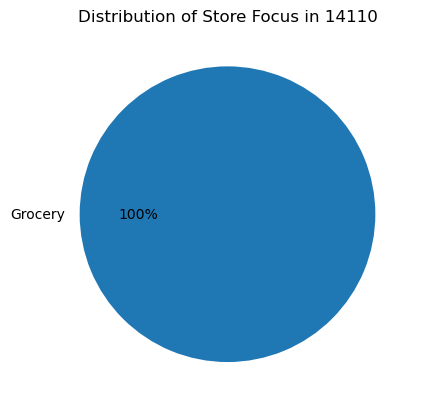

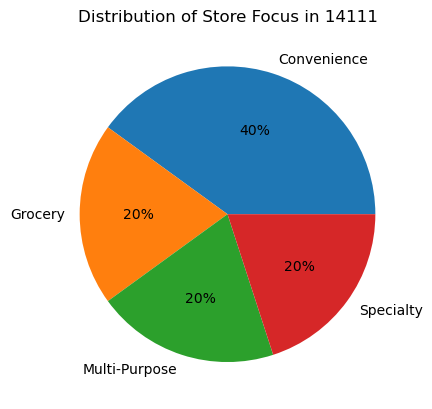

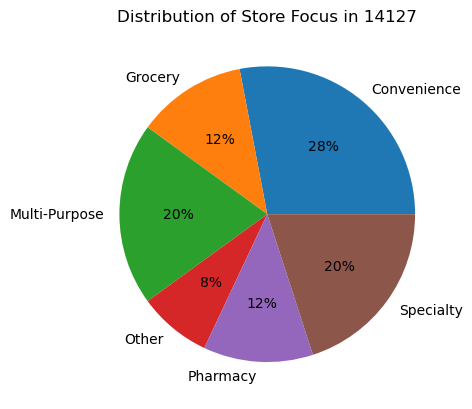

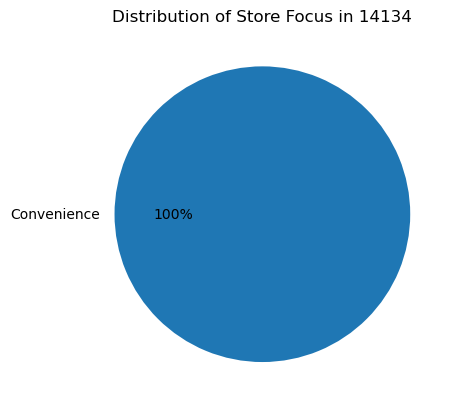

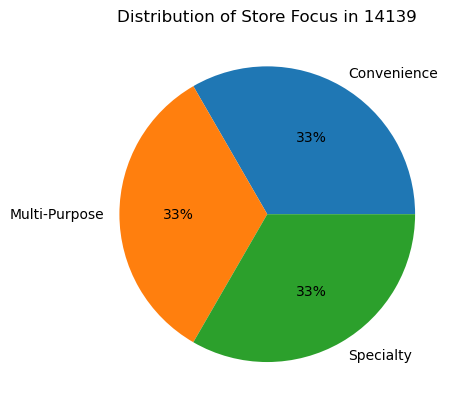

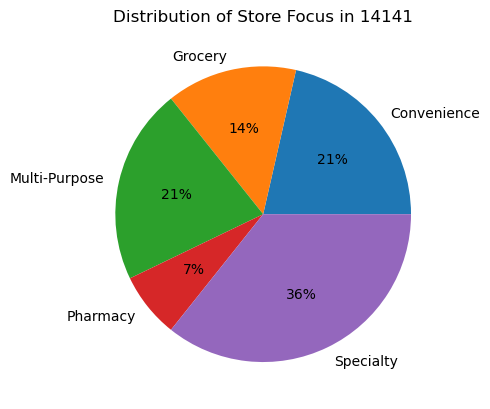

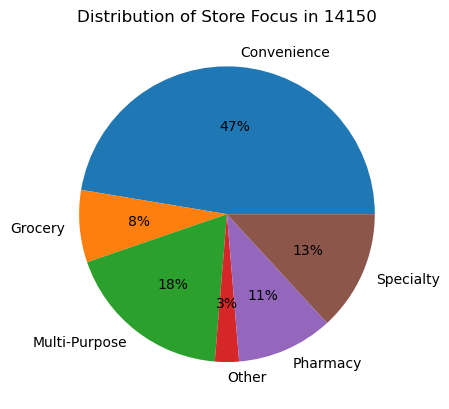

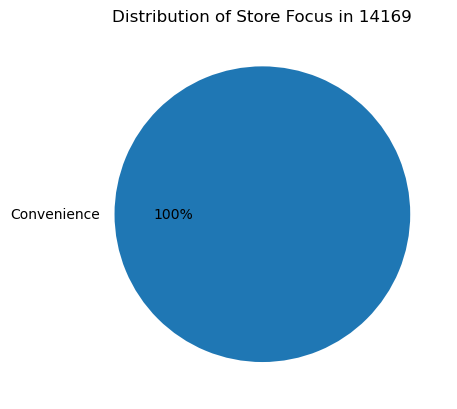

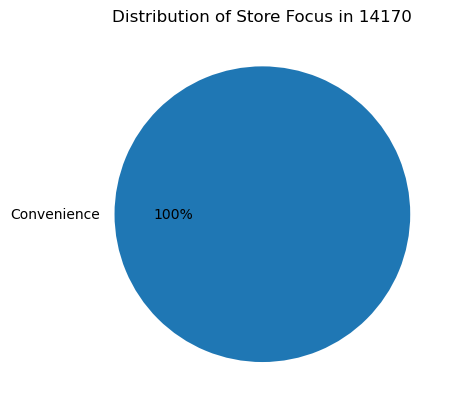

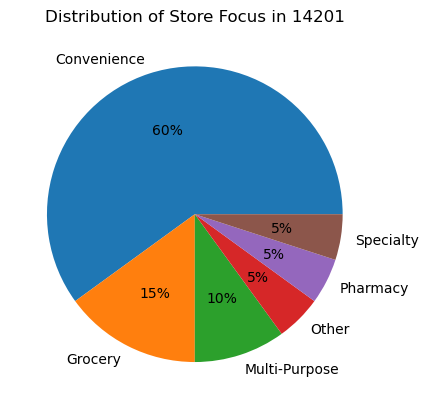

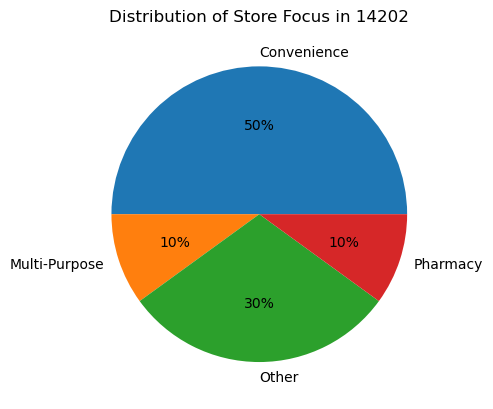

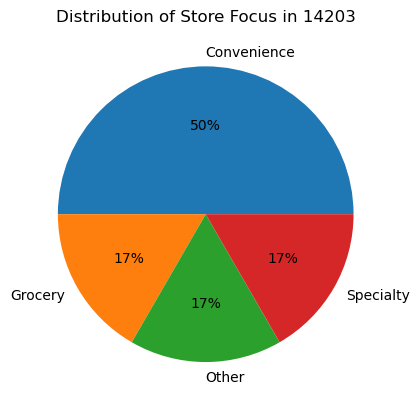

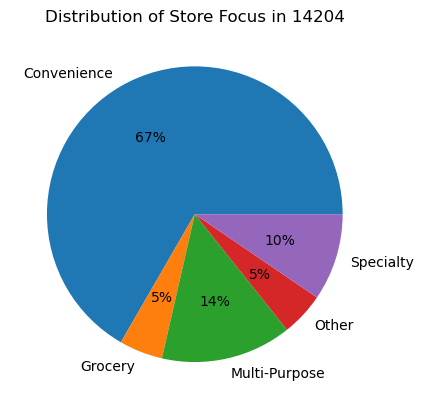

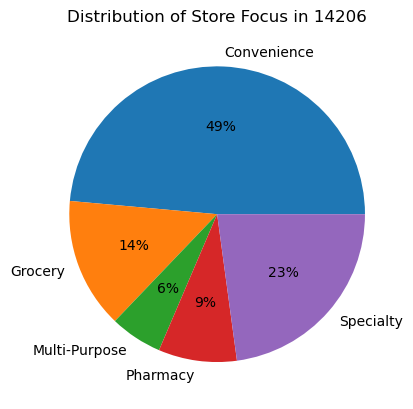

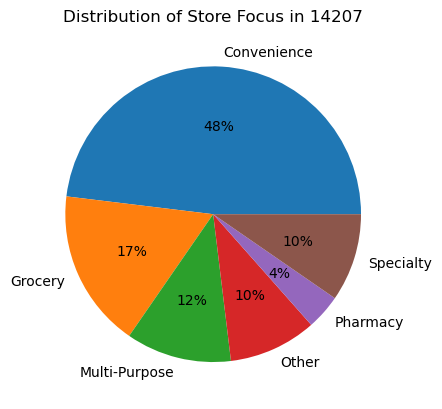

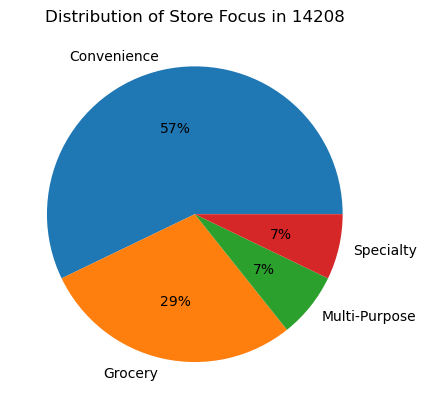

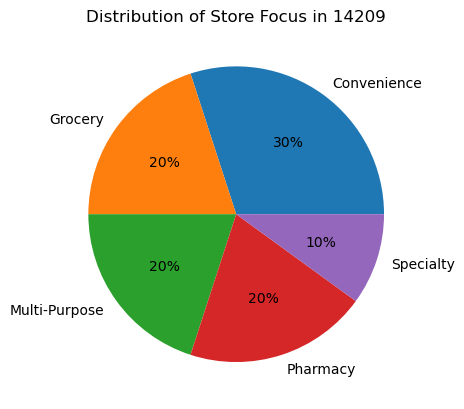

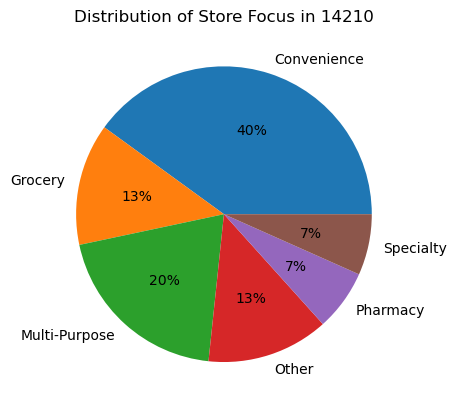

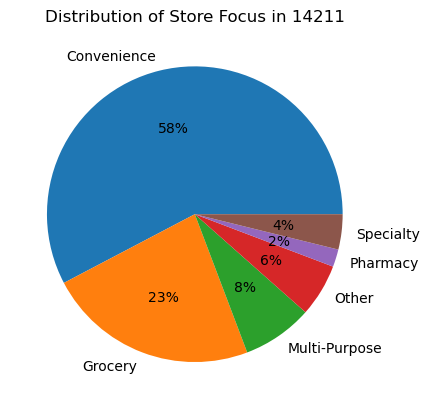

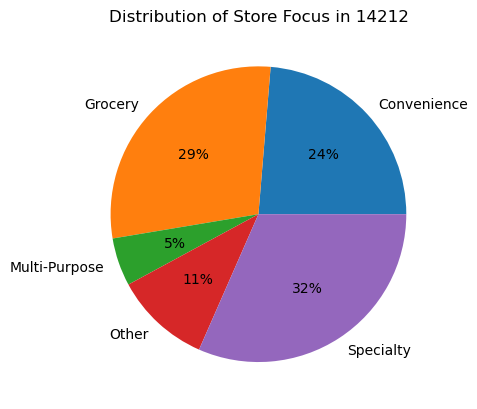

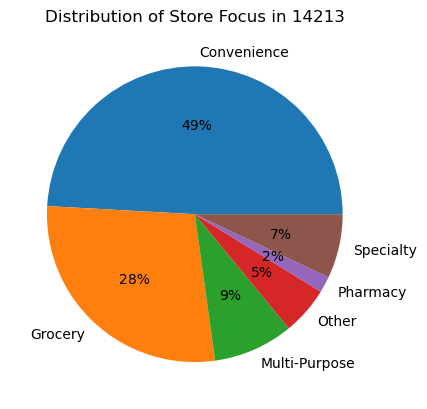

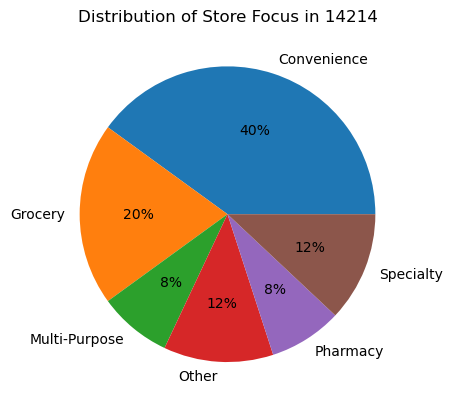

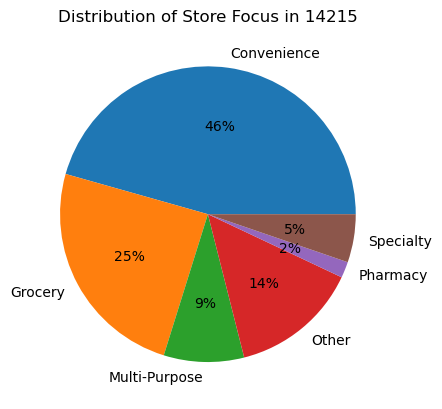

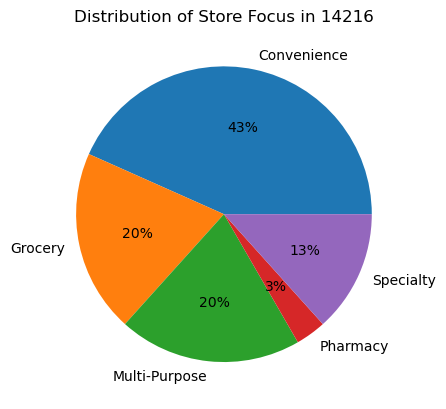

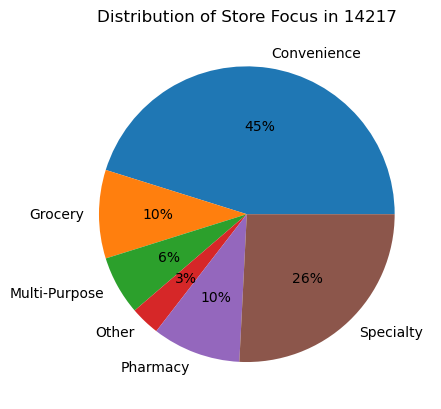

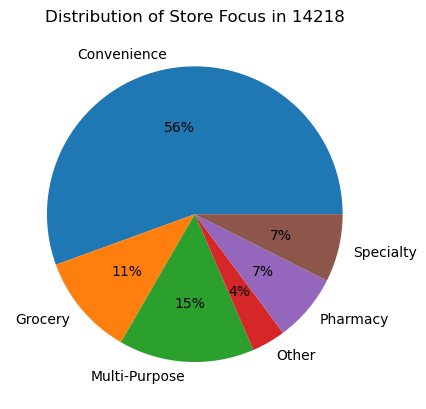

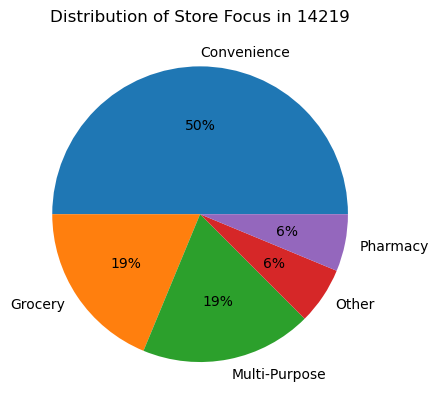

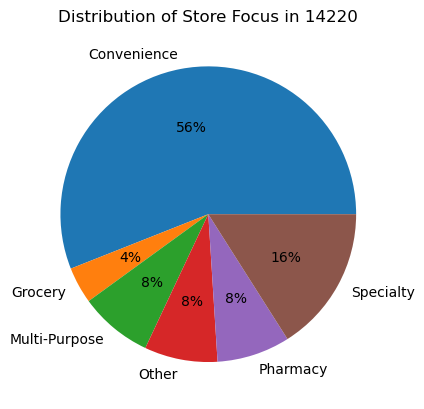

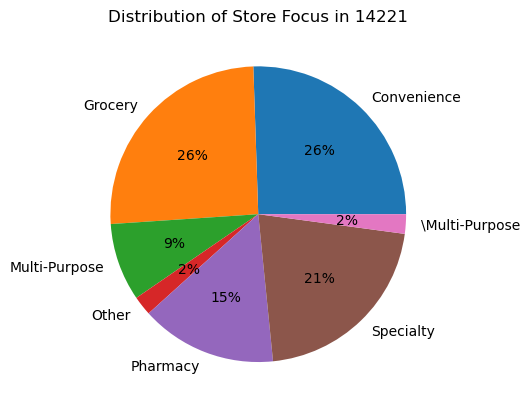

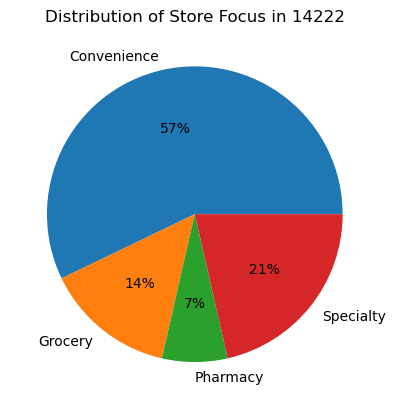

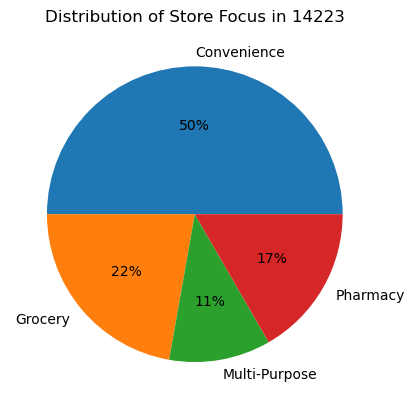

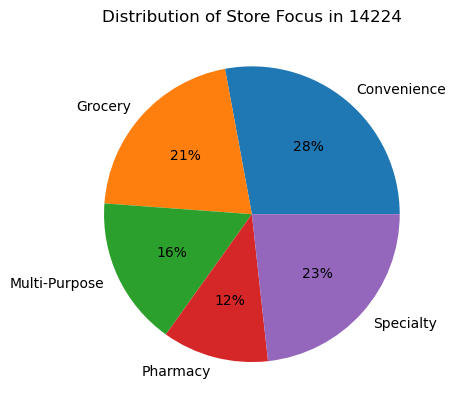

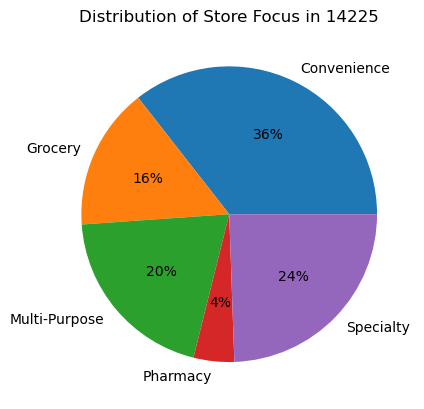

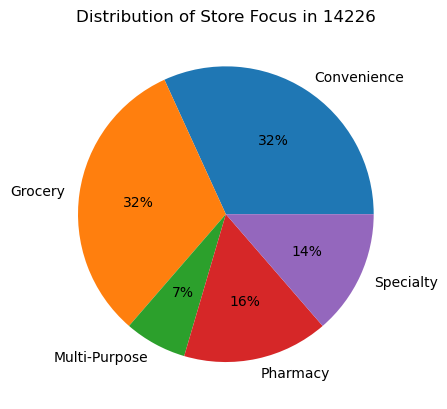

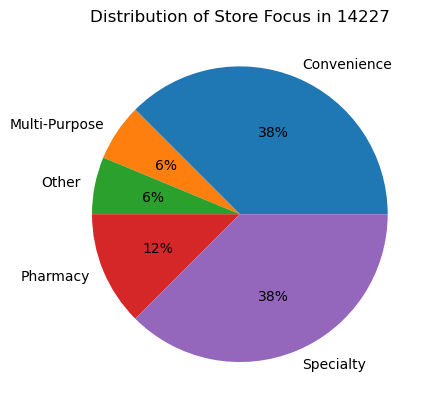

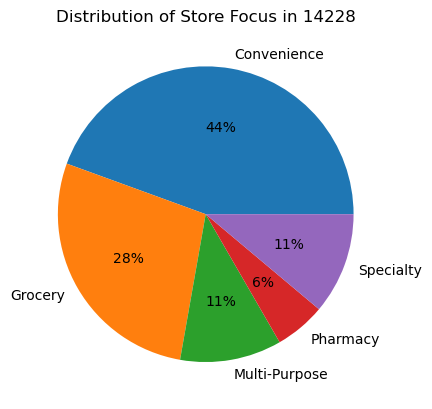

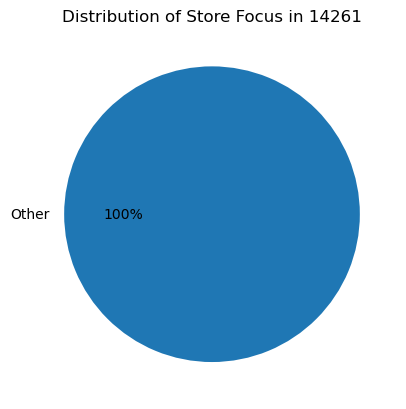

In [180]:
for zipcode in query_zipcodes['Zipcode']:
    sql_statement = f"""
        SELECT 
            Food_Store.Store_Focus,
            COUNT(Food_Store.Store_Name) AS Number_of_Stores
        FROM Food_Store
        WHERE Zipcode = {zipcode}
        GROUP BY Store_Focus
    """
    testquery2 = pd.read_sql_query(sql_statement, conn)
    
    testquery2.set_index('Store_Focus')['Number_of_Stores'].plot.pie(autopct='%1.f%%', ylabel='')
    plt.title(f"Distribution of Store Focus in {zipcode}")
    plt.show()

#### What is the distribution of Establishment Types?

In [182]:
sql_statement = '''SELECT 
    Establishment_Type.Est_Type,
    Establishment_Code,
    COUNT(*) AS Total
FROM (
    SELECT Est_Code1 AS Establishment_Code FROM Food_Store
    UNION ALL
    SELECT Est_Code2 AS Establishment_Code FROM Food_Store
    UNION ALL
    SELECT Est_Code3 AS Establishment_Code FROM Food_Store
    UNION ALL
    SELECT Est_Code4 AS Establishment_Code FROM Food_Store
) AS All_Establishment_Codes
JOIN Establishment_Type ON Establishment_Code = Establishment_Type.Est_Code
WHERE Establishment_Code IS NOT NULL
GROUP BY Establishment_Code
ORDER BY Total DESC;
    '''
query8 = pd.read_sql_query(sql_statement, conn)

In [183]:
query8

,Est_Type,Establishment_Code,Total
0,Store,A,1126
1,Food Manufacturer,C,782
2,Bakery,B,71
3,Wholesale Manufactuer,H,19
4,Food Warehouse,D,11
5,Slaughterhouse,Y,3
6,Farm Winery,W,2
7,Vehicle,K,2


<Axes: xlabel='Establishment_Code'>

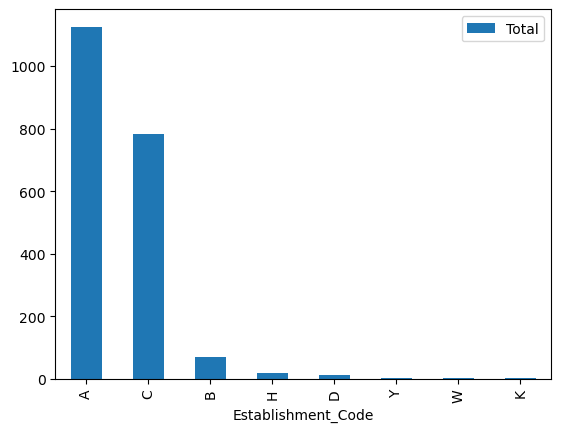

In [184]:
query8.plot.bar(x='Establishment_Code')

### Income Brackets and Population Size
This section details how many people of each income bracket are located within a region. The various regions explored include Erie county as a whole, the individual zipcodes, as well as the City of Buffalo versus the Suburbs.

#### How many returns does each zipcode have for the various income brackets?

In [187]:
sql_statement = '''SELECT 
    loc.Zipcode,
    Income_Under_25k.No_of_Returns AS Returns_Under_25k,
    Income_25k_to_50k.No_of_Returns AS Returns_25k_to_50k,
    Income_50k_to_75k.No_of_Returns AS Returns_50k_to_75k,
    Income_75k_to_100k.No_of_Returns AS Returns_75k_to_100k,
    Income_100k_to_200k.No_of_Returns AS Returns_100k_to_200k,
    Income_Above_200k.No_of_Returns AS Returns_Above_200k
FROM 
    (SELECT DISTINCT Zipcode FROM Income_Under_25k
     UNION
     SELECT DISTINCT Zipcode FROM Income_25k_to_50k
     UNION
     SELECT DISTINCT Zipcode FROM Income_50k_to_75k
     UNION
     SELECT DISTINCT Zipcode FROM Income_75k_to_100k
     UNION
     SELECT DISTINCT Zipcode FROM Income_100k_to_200k
     UNION
     SELECT DISTINCT Zipcode FROM Income_Above_200k) AS Zipcodes
LEFT JOIN Location AS loc ON Zipcodes.Zipcode = loc.Zipcode
LEFT JOIN Income_Under_25k ON Income_Under_25k.Zipcode = loc.Zipcode
LEFT JOIN Income_25k_to_50k ON Income_25k_to_50k.Zipcode = loc.Zipcode
LEFT JOIN Income_50k_to_75k ON Income_50k_to_75k.Zipcode = loc.Zipcode
LEFT JOIN Income_75k_to_100k ON Income_75k_to_100k.Zipcode = loc.Zipcode
LEFT JOIN Income_100k_to_200k ON Income_100k_to_200k.Zipcode = loc.Zipcode
LEFT JOIN Income_Above_200k ON Income_Above_200k.Zipcode = loc.Zipcode;
    '''
query9 = pd.read_sql_query(sql_statement, conn)

In [188]:
query9

,Zipcode,Returns_Under_25k,Returns_25k_to_50k,Returns_50k_to_75k,Returns_75k_to_100k,Returns_100k_to_200k,Returns_Above_200k
0,14001,1190,1170,830,600,890,200
1,14004,1330,1310,890,710,1110,190
2,14006,1210,1280,820,550,680,110
3,14025,340,320,260,220,360,90
4,14026,100,90,90,60,90,20
5,14030,190,190,140,100,130,0
6,14031,1320,920,680,520,1080,790
7,14032,1150,660,500,430,1070,900
8,14033,280,240,190,140,310,80
9,14034,210,200,170,110,140,0


#### What is the breakdown of income for Erie County?

<Axes: >

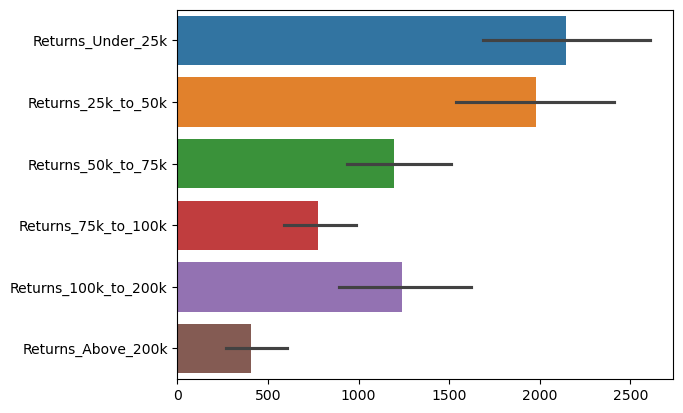

In [190]:
sns.barplot(query9, orient='h')

#### What is the breakdown of income brackets for each zipcode?

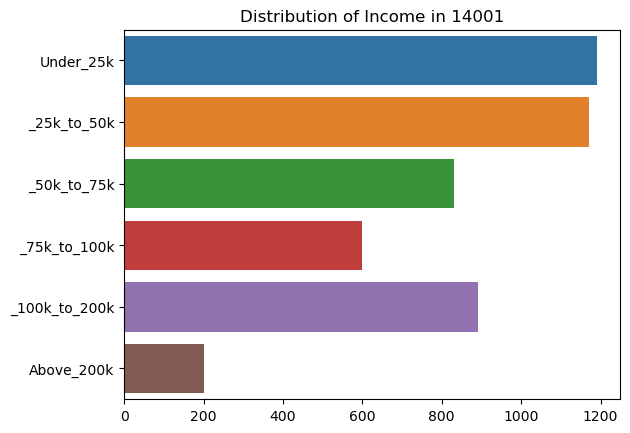

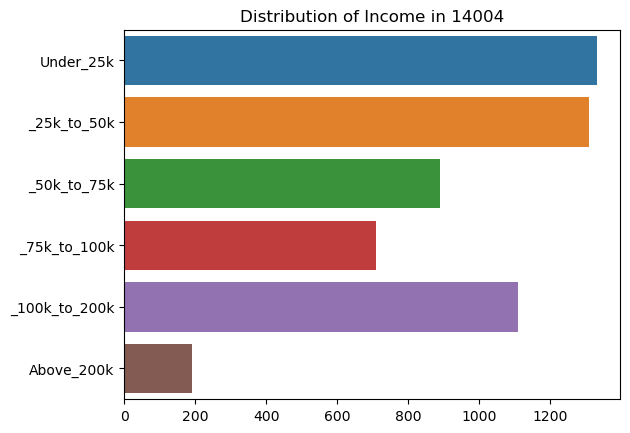

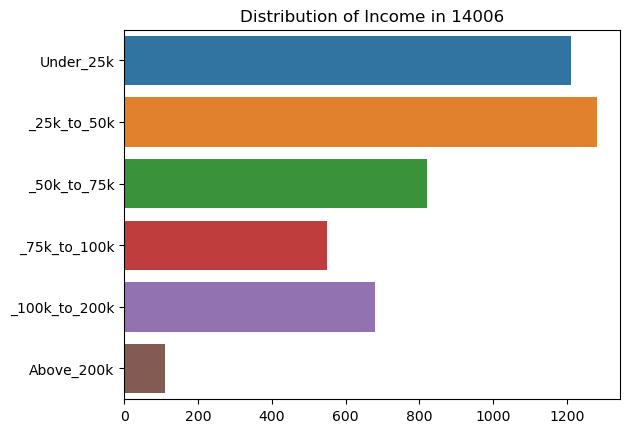

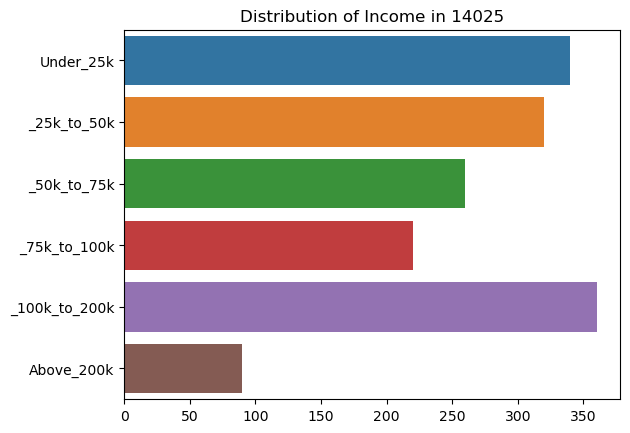

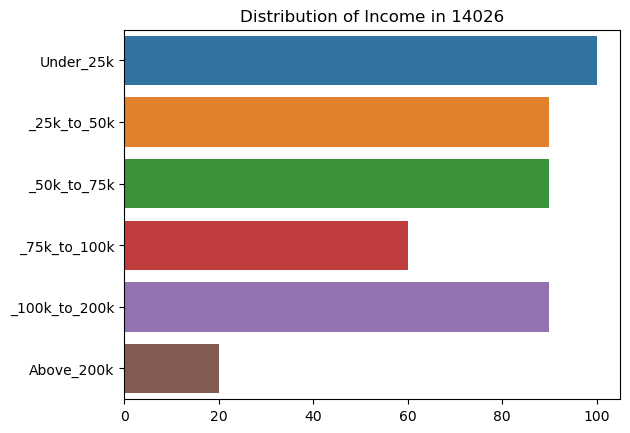

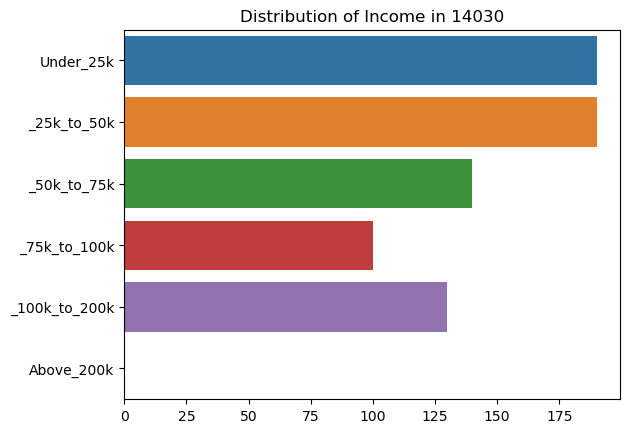

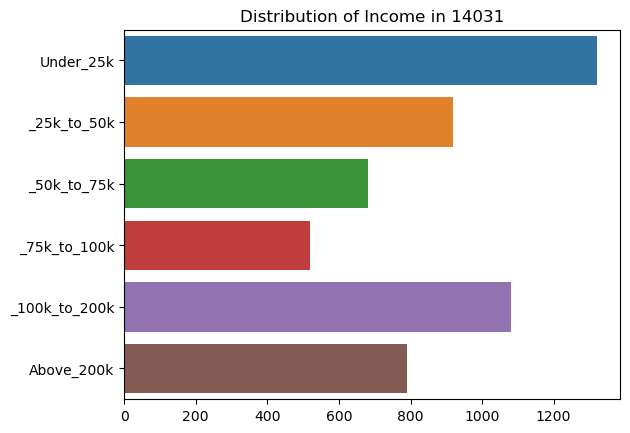

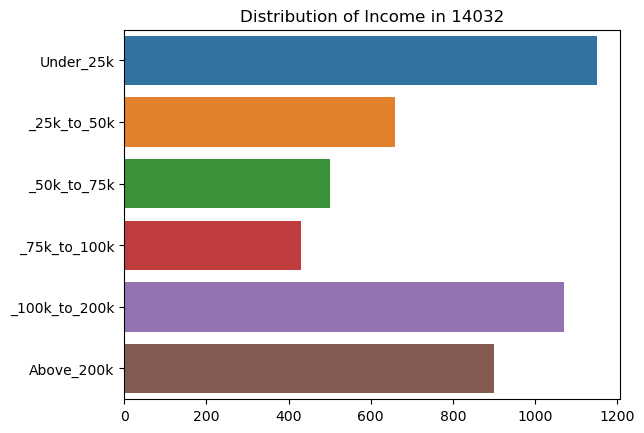

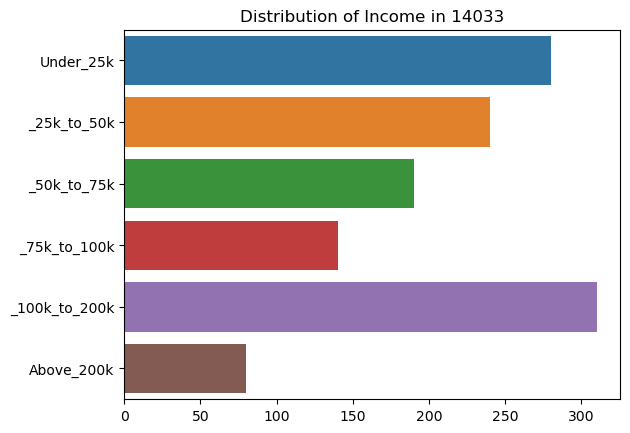

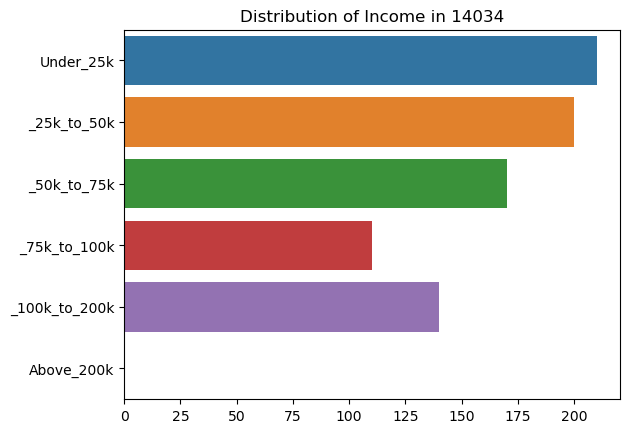

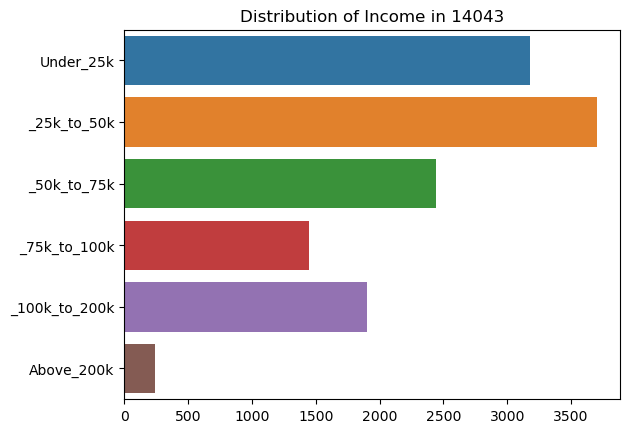

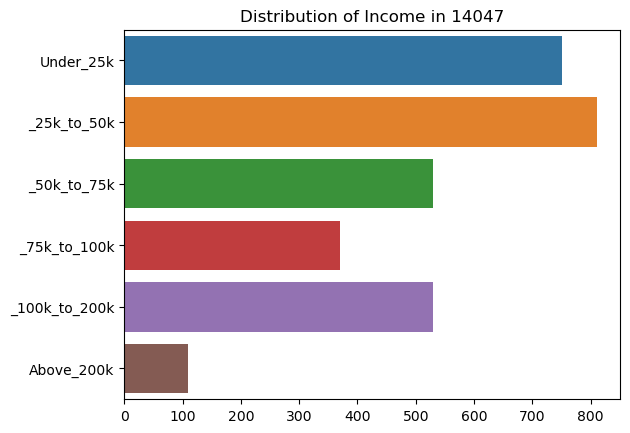

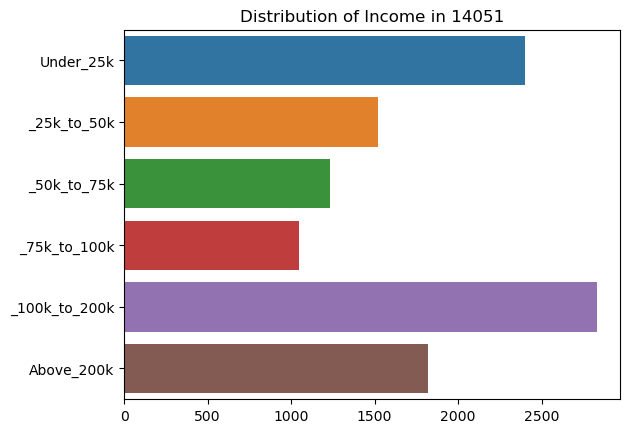

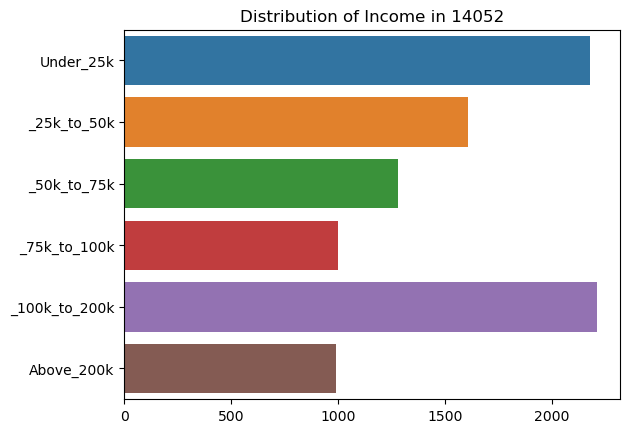

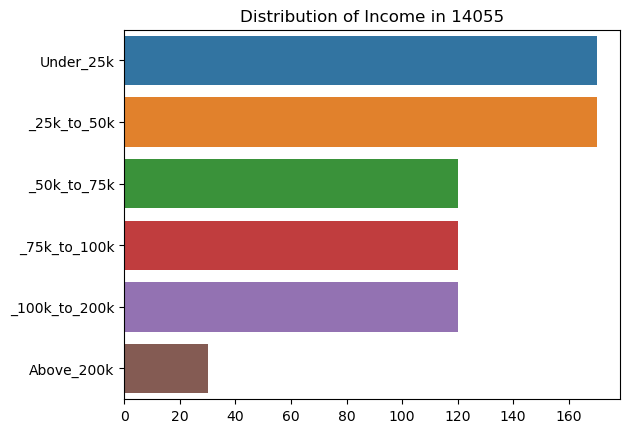

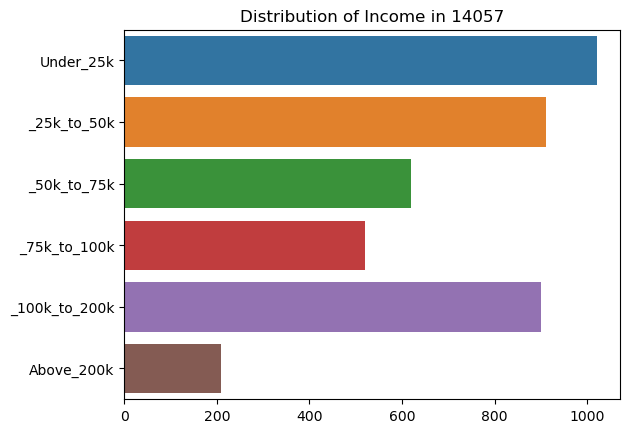

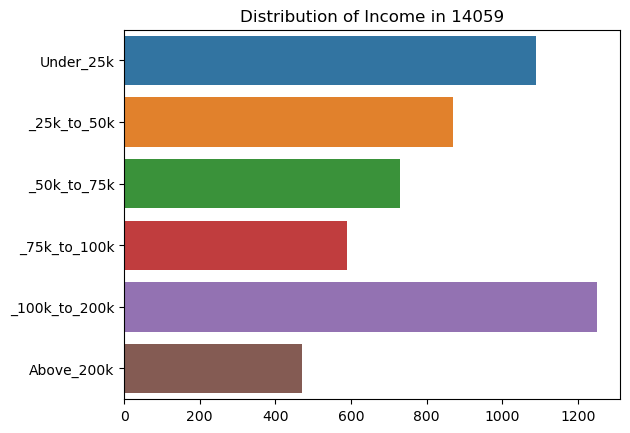

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


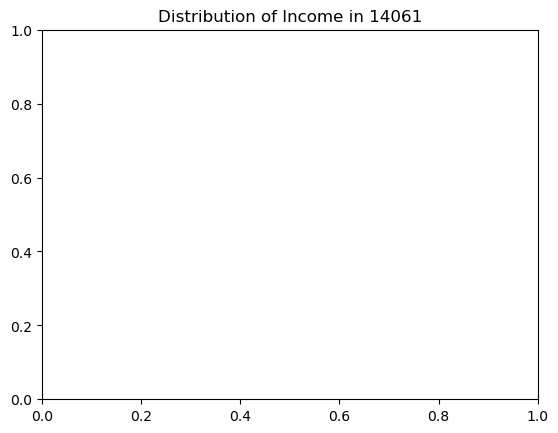

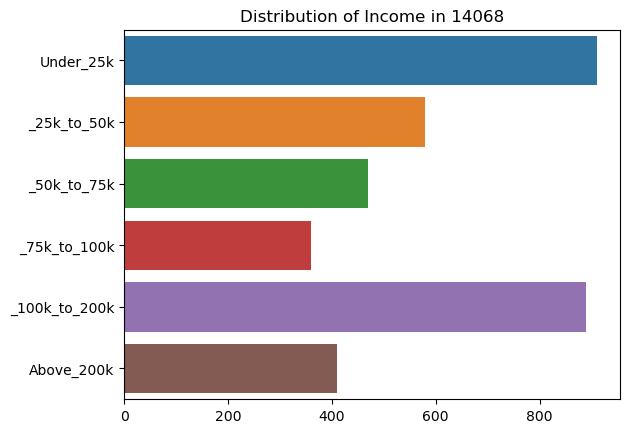

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


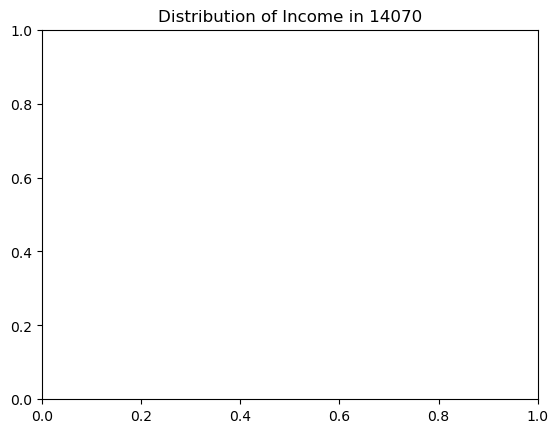

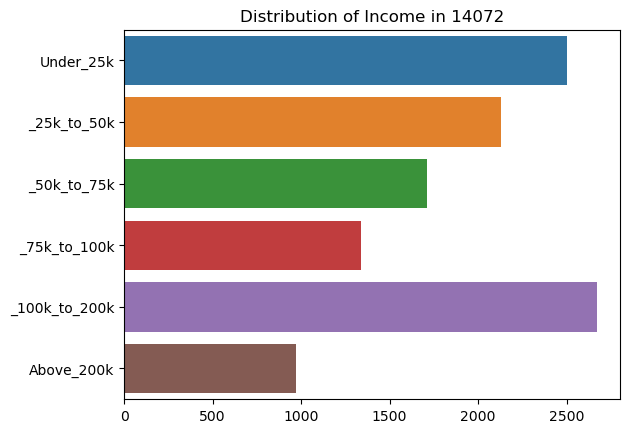

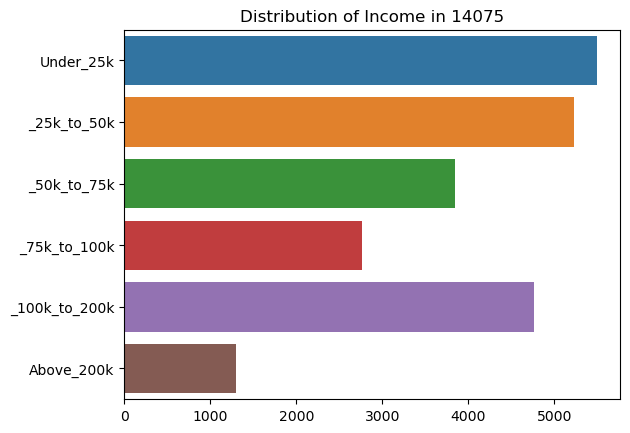

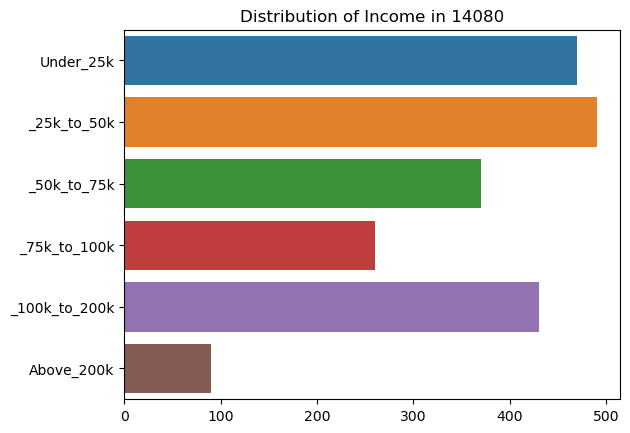

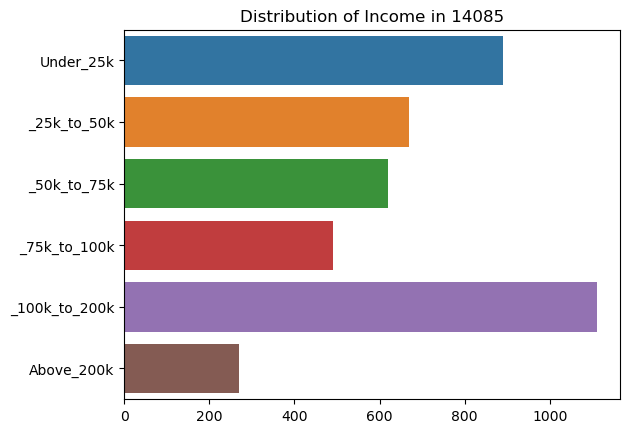

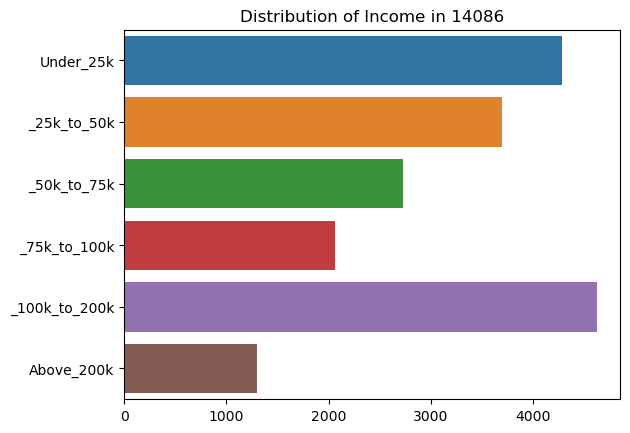

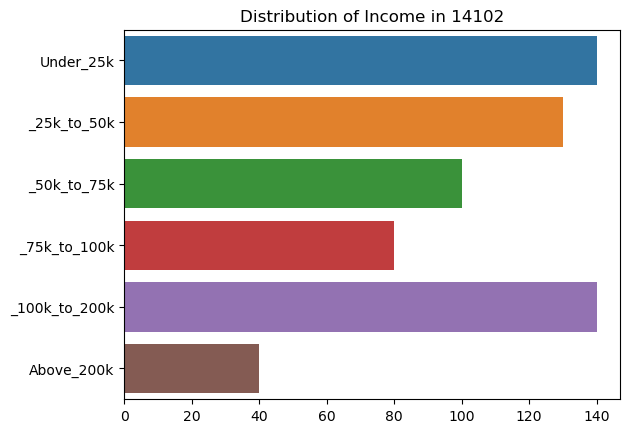

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


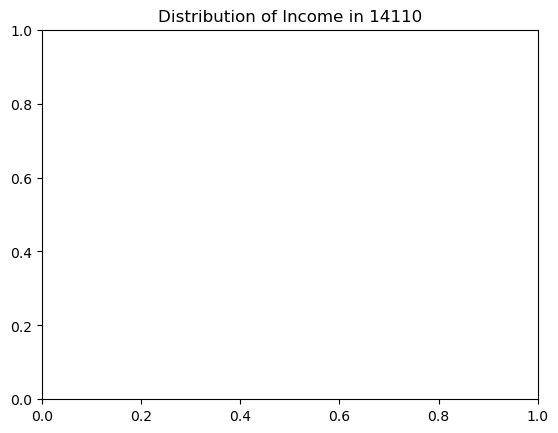

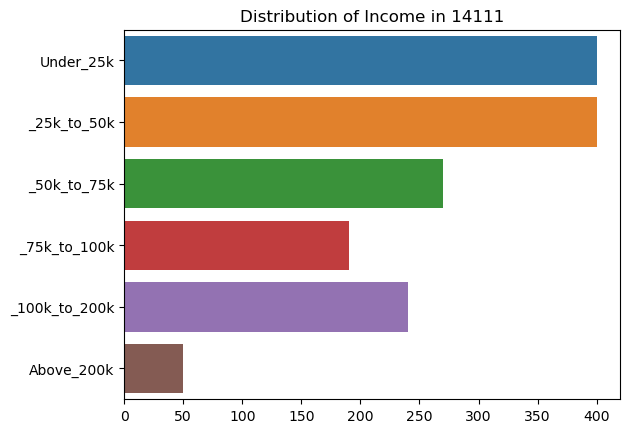

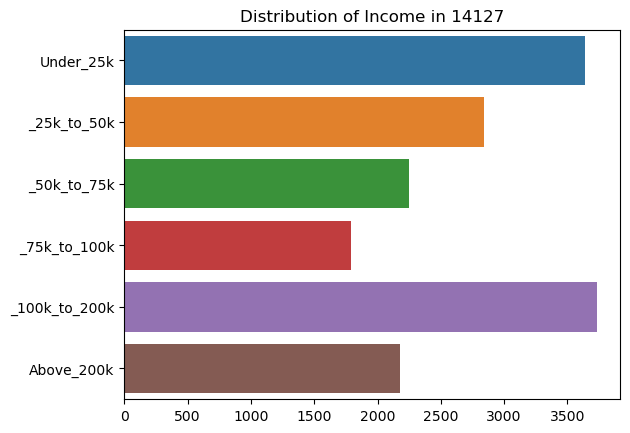

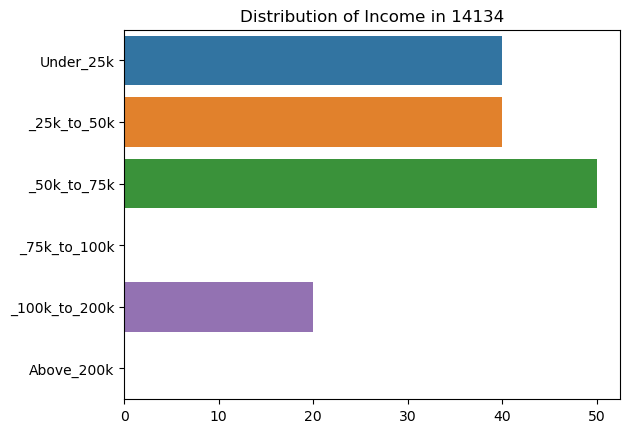

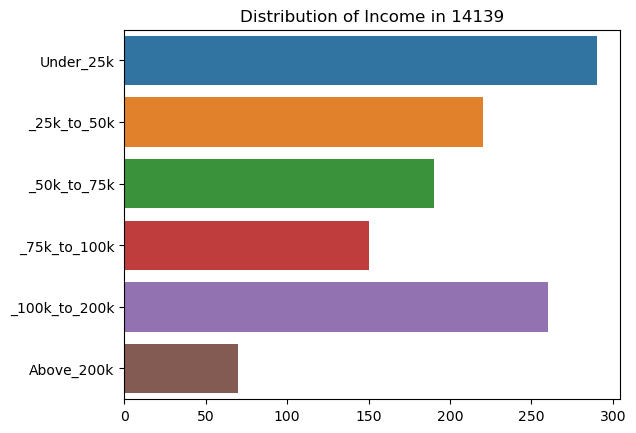

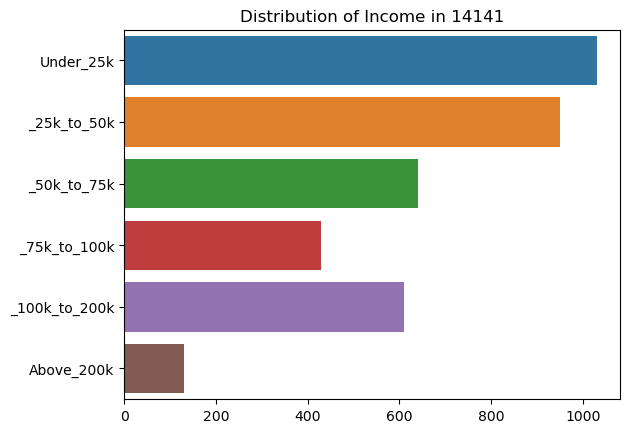

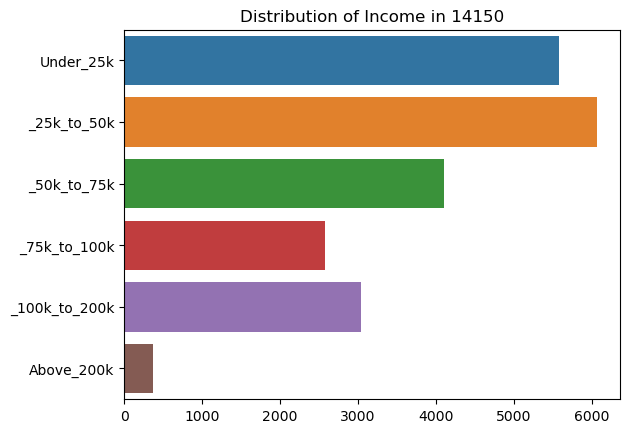

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


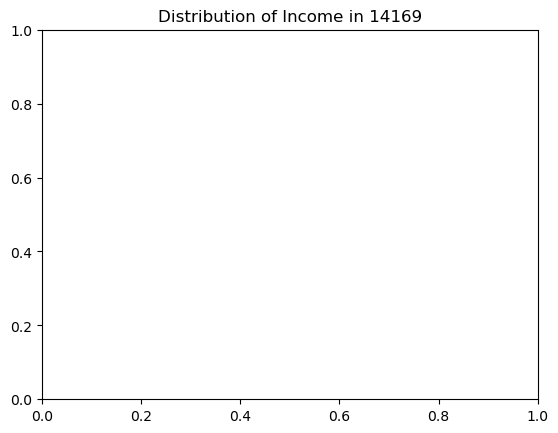

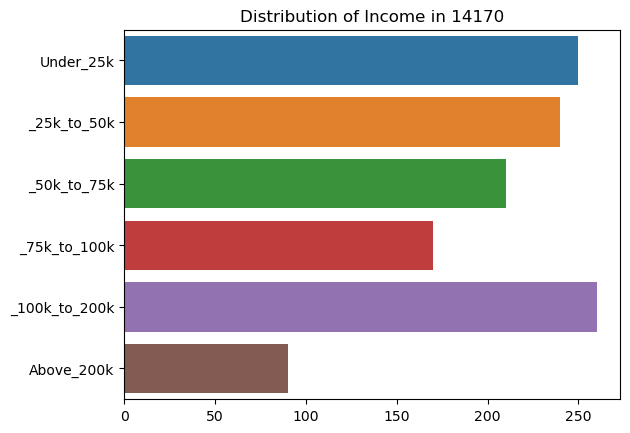

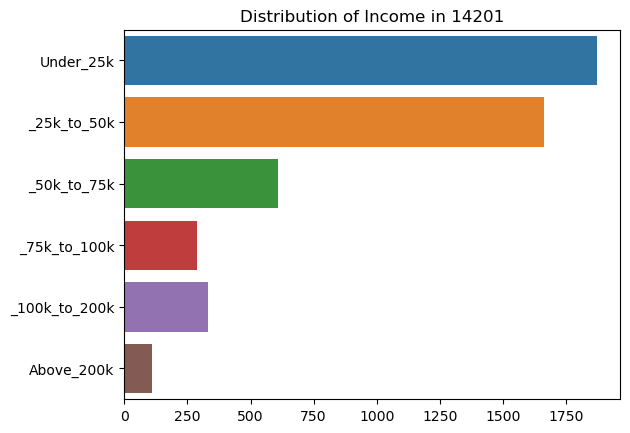

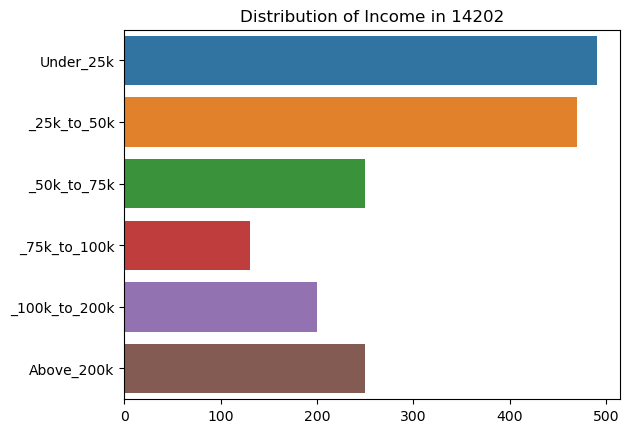

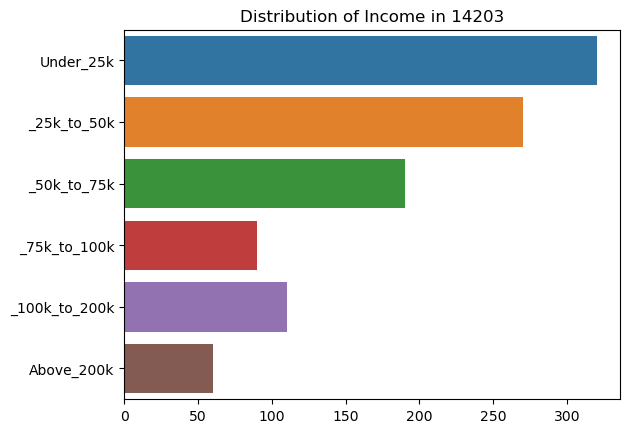

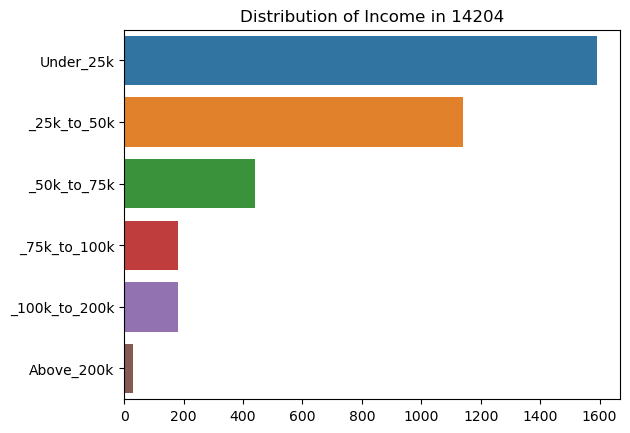

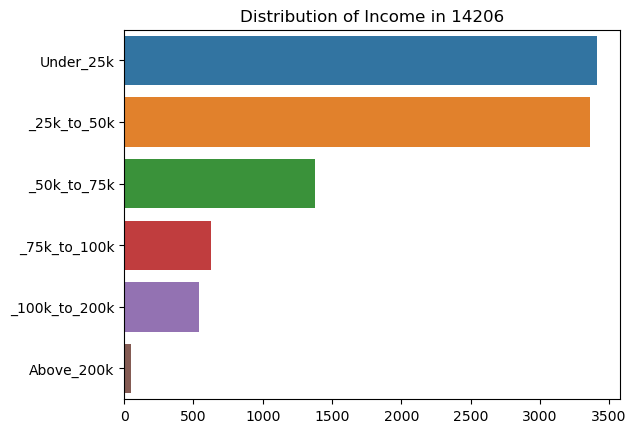

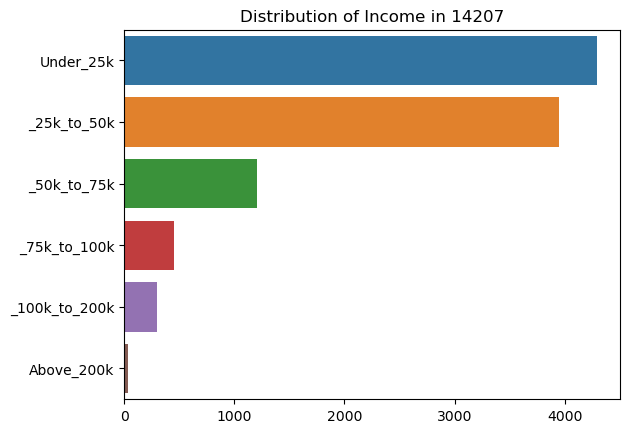

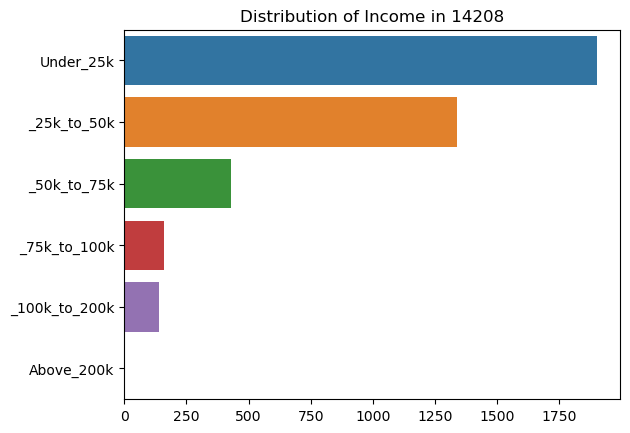

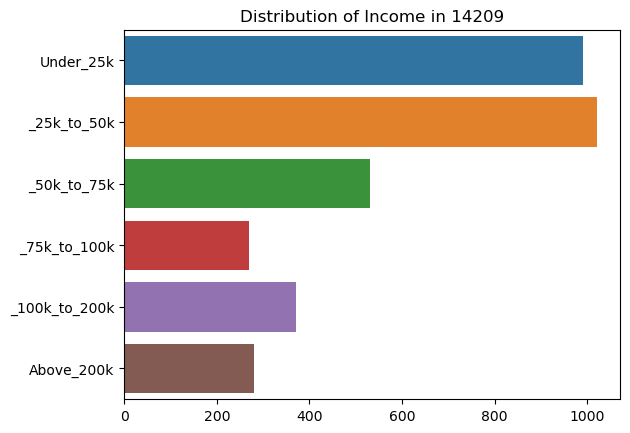

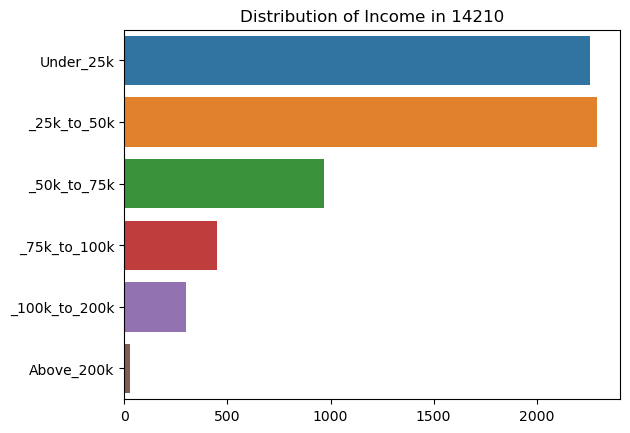

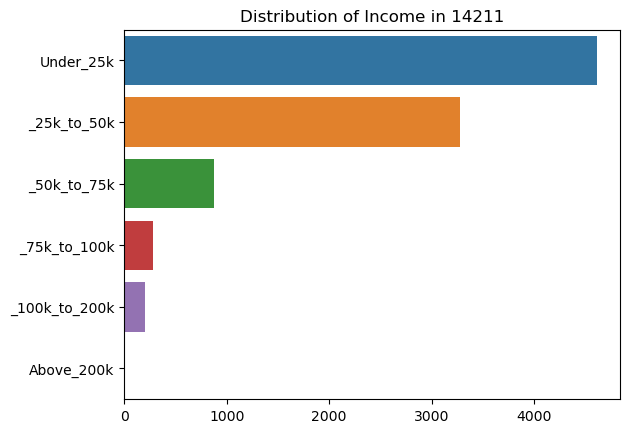

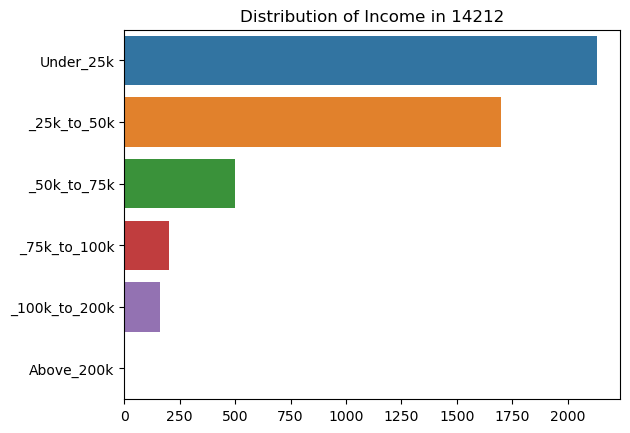

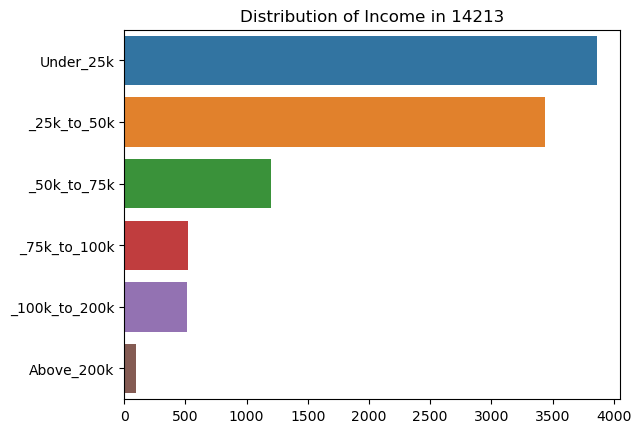

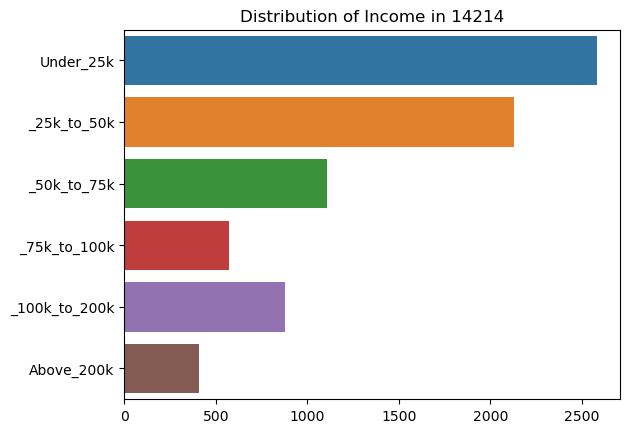

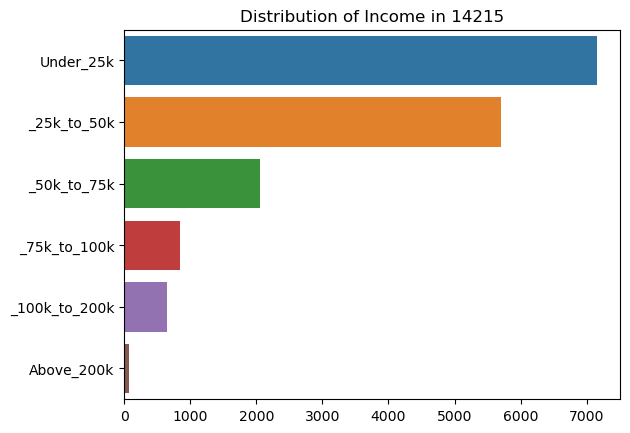

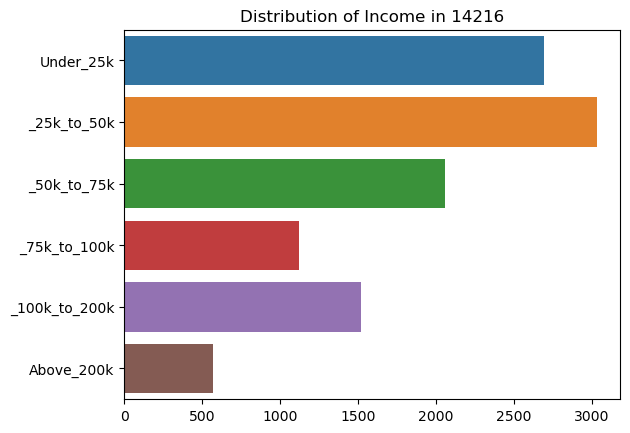

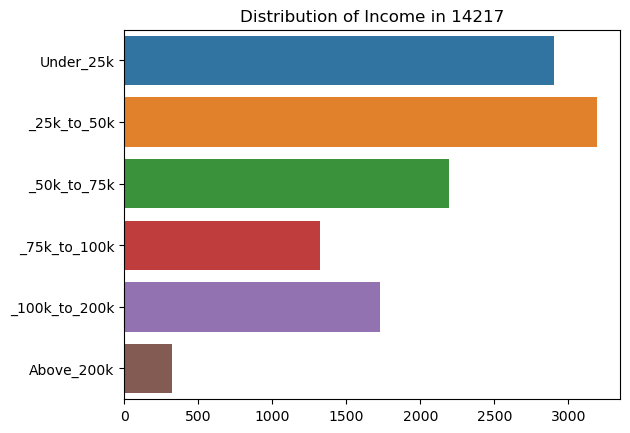

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


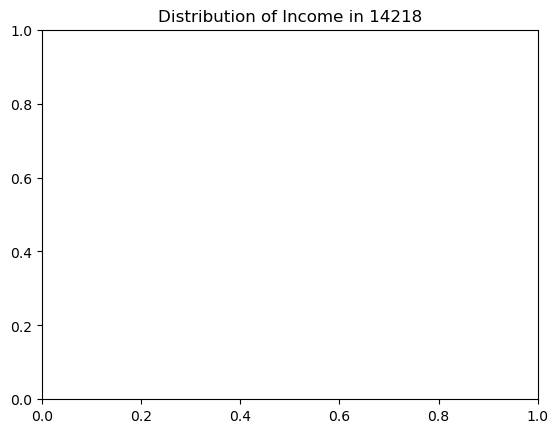

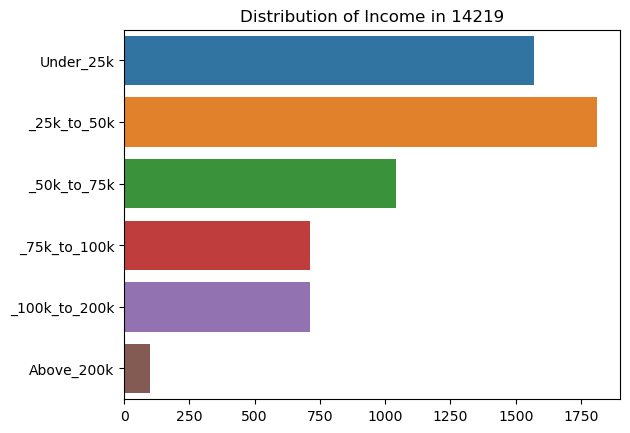

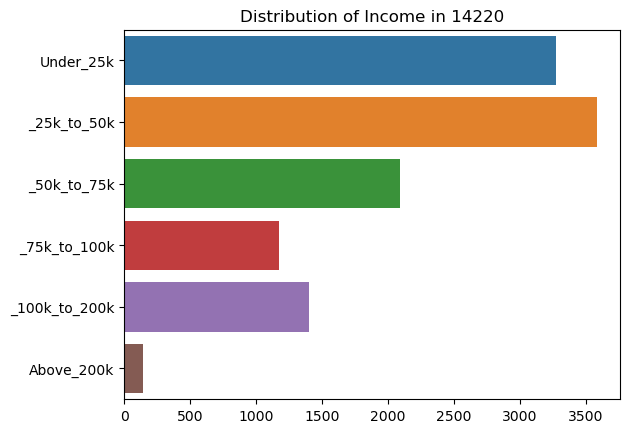

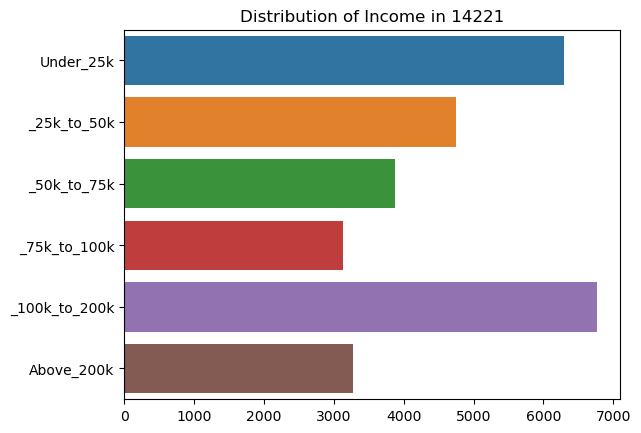

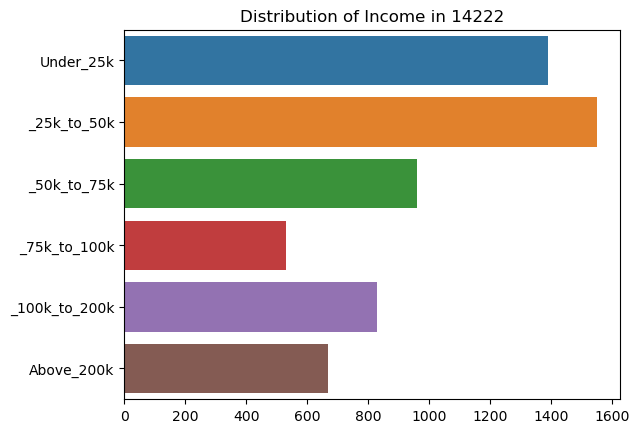

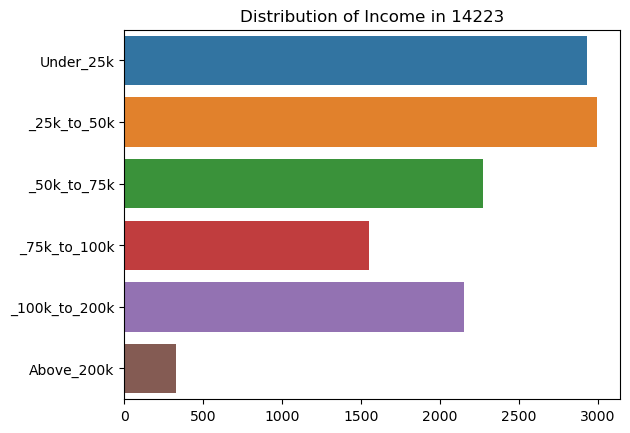

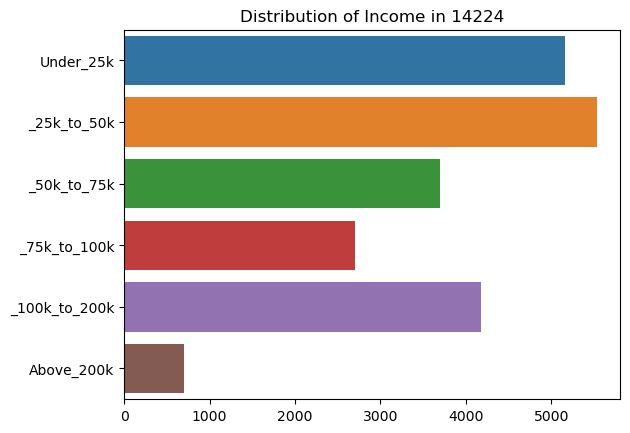

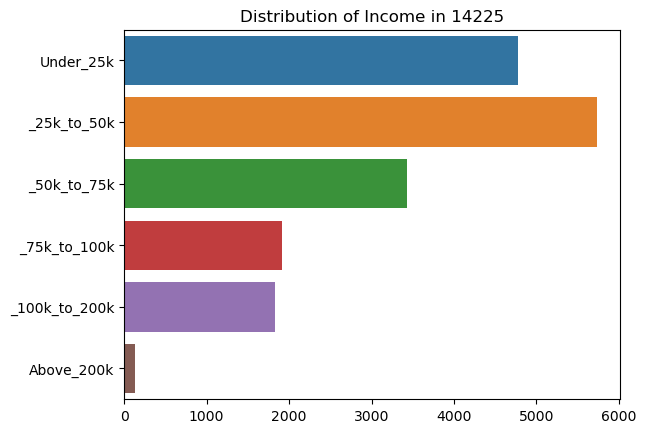

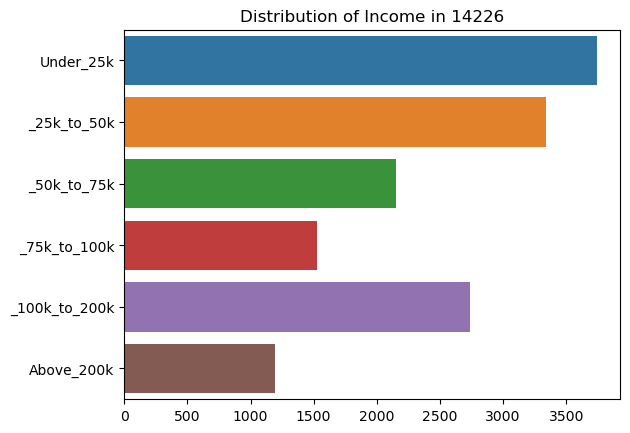

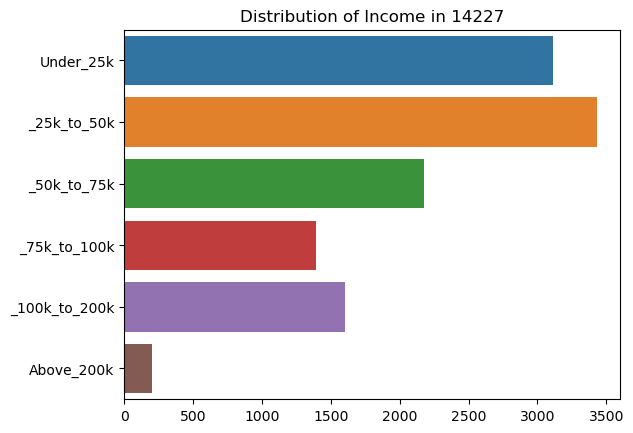

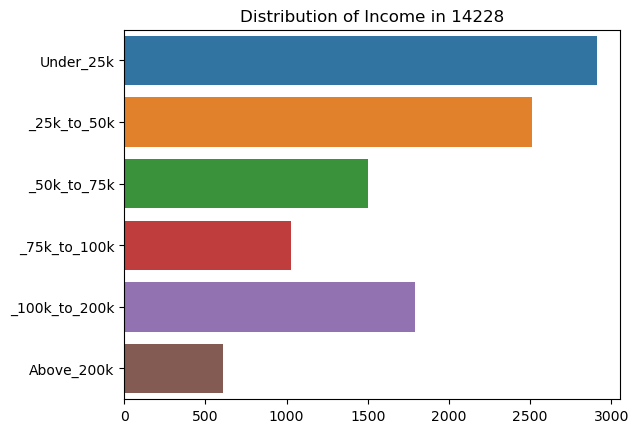

C:\Users\egreg\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


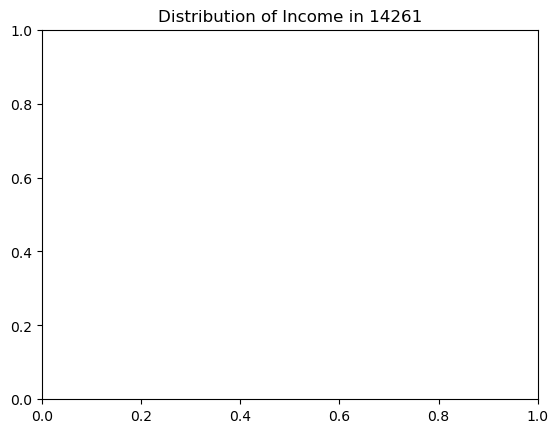

In [192]:
for zipcode in query_zipcodes['Zipcode']:
    sql_statement = f""" SELECT
        loc.Zipcode,
        Income_Under_25k.No_of_Returns AS Under_25k,
        Income_25k_to_50k.No_of_Returns AS _25k_to_50k,
        Income_50k_to_75k.No_of_Returns AS _50k_to_75k,
        Income_75k_to_100k.No_of_Returns AS _75k_to_100k,
        Income_100k_to_200k.No_of_Returns AS _100k_to_200k,
        Income_Above_200k.No_of_Returns AS Above_200k
    FROM 
        (SELECT DISTINCT Zipcode FROM Income_Under_25k
         UNION
         SELECT DISTINCT Zipcode FROM Income_25k_to_50k
         UNION
         SELECT DISTINCT Zipcode FROM Income_50k_to_75k
         UNION
         SELECT DISTINCT Zipcode FROM Income_75k_to_100k
         UNION
         SELECT DISTINCT Zipcode FROM Income_100k_to_200k
         UNION
         SELECT DISTINCT Zipcode FROM Income_Above_200k) AS Zipcodes
    LEFT JOIN Location AS loc ON Zipcodes.Zipcode = loc.Zipcode
    LEFT JOIN Income_Under_25k ON Income_Under_25k.Zipcode = loc.Zipcode
    LEFT JOIN Income_25k_to_50k ON Income_25k_to_50k.Zipcode = loc.Zipcode
    LEFT JOIN Income_50k_to_75k ON Income_50k_to_75k.Zipcode = loc.Zipcode
    LEFT JOIN Income_75k_to_100k ON Income_75k_to_100k.Zipcode = loc.Zipcode
    LEFT JOIN Income_100k_to_200k ON Income_100k_to_200k.Zipcode = loc.Zipcode
    LEFT JOIN Income_Above_200k ON Income_Above_200k.Zipcode = loc.Zipcode
    WHERE loc.Zipcode = {zipcode}
    """
    testquery10 = pd.read_sql_query(sql_statement, conn)
    
    sns.barplot(data=testquery10, orient='h')
    plt.title(f"Distribution of Income in {zipcode}")
    plt.show()

#### What is the breakdown of income for City of Buffalo versus the Suburbs?

In [194]:
sql_statement = '''SELECT 
    loc.Zipcode,
    loc.City,
    Income_Under_25k.No_of_Returns AS Returns_Under_25k,
    Income_25k_to_50k.No_of_Returns AS Returns_25k_to_50k,
    Income_50k_to_75k.No_of_Returns AS Returns_50k_to_75k,
    Income_75k_to_100k.No_of_Returns AS Returns_75k_to_100k,
    Income_100k_to_200k.No_of_Returns AS Returns_100k_to_200k,
    Income_Above_200k.No_of_Returns AS Returns_Above_200k
FROM 
    (SELECT DISTINCT Zipcode FROM Income_Under_25k
     UNION
     SELECT DISTINCT Zipcode FROM Income_25k_to_50k
     UNION
     SELECT DISTINCT Zipcode FROM Income_50k_to_75k
     UNION
     SELECT DISTINCT Zipcode FROM Income_75k_to_100k
     UNION
     SELECT DISTINCT Zipcode FROM Income_100k_to_200k
     UNION
     SELECT DISTINCT Zipcode FROM Income_Above_200k) AS Zipcodes
LEFT JOIN Location AS loc ON Zipcodes.Zipcode = loc.Zipcode
LEFT JOIN Income_Under_25k ON Income_Under_25k.Zipcode = loc.Zipcode
LEFT JOIN Income_25k_to_50k ON Income_25k_to_50k.Zipcode = loc.Zipcode
LEFT JOIN Income_50k_to_75k ON Income_50k_to_75k.Zipcode = loc.Zipcode
LEFT JOIN Income_75k_to_100k ON Income_75k_to_100k.Zipcode = loc.Zipcode
LEFT JOIN Income_100k_to_200k ON Income_100k_to_200k.Zipcode = loc.Zipcode
LEFT JOIN Income_Above_200k ON Income_Above_200k.Zipcode = loc.Zipcode
WHERE loc.City = 'BUFFALO'
    '''
query11 = pd.read_sql_query(sql_statement, conn)

In [195]:
query11

,Zipcode,City,Returns_Under_25k,Returns_25k_to_50k,Returns_50k_to_75k,Returns_75k_to_100k,Returns_100k_to_200k,Returns_Above_200k
0,14202,BUFFALO,490,470,250,130,200,250
1,14213,BUFFALO,3860,3440,1200,520,510,100
2,14220,BUFFALO,3270,3580,2090,1170,1400,140
3,14222,BUFFALO,1390,1550,960,530,830,670
4,14206,BUFFALO,3410,3360,1380,630,540,50
5,14201,BUFFALO,1870,1660,610,290,330,110
6,14210,BUFFALO,2260,2290,970,450,300,30
7,14207,BUFFALO,4290,3950,1210,450,300,30
8,14203,BUFFALO,320,270,190,90,110,60
9,14211,BUFFALO,4610,3280,880,280,200,0


In [196]:
sql_statement = '''SELECT 
    loc.Zipcode,
    loc.City,
    Income_Under_25k.No_of_Returns AS Returns_Under_25k,
    Income_25k_to_50k.No_of_Returns AS Returns_25k_to_50k,
    Income_50k_to_75k.No_of_Returns AS Returns_50k_to_75k,
    Income_75k_to_100k.No_of_Returns AS Returns_75k_to_100k,
    Income_100k_to_200k.No_of_Returns AS Returns_100k_to_200k,
    Income_Above_200k.No_of_Returns AS Returns_Above_200k
FROM 
    (SELECT DISTINCT Zipcode FROM Income_Under_25k
     UNION
     SELECT DISTINCT Zipcode FROM Income_25k_to_50k
     UNION
     SELECT DISTINCT Zipcode FROM Income_50k_to_75k
     UNION
     SELECT DISTINCT Zipcode FROM Income_75k_to_100k
     UNION
     SELECT DISTINCT Zipcode FROM Income_100k_to_200k
     UNION
     SELECT DISTINCT Zipcode FROM Income_Above_200k) AS Zipcodes
LEFT JOIN Location AS loc ON Zipcodes.Zipcode = loc.Zipcode
LEFT JOIN Income_Under_25k ON Income_Under_25k.Zipcode = loc.Zipcode
LEFT JOIN Income_25k_to_50k ON Income_25k_to_50k.Zipcode = loc.Zipcode
LEFT JOIN Income_50k_to_75k ON Income_50k_to_75k.Zipcode = loc.Zipcode
LEFT JOIN Income_75k_to_100k ON Income_75k_to_100k.Zipcode = loc.Zipcode
LEFT JOIN Income_100k_to_200k ON Income_100k_to_200k.Zipcode = loc.Zipcode
LEFT JOIN Income_Above_200k ON Income_Above_200k.Zipcode = loc.Zipcode
WHERE loc.City != 'BUFFALO'
    '''
query12 = pd.read_sql_query(sql_statement, conn)

In [197]:
query12

,Zipcode,City,Returns_Under_25k,Returns_25k_to_50k,Returns_50k_to_75k,Returns_75k_to_100k,Returns_100k_to_200k,Returns_Above_200k
0,14001,AKRON,1190,1170,830,600,890,200
1,14226,AMHERST,3740,3340,2150,1530,2740,1190
2,14051,EAST AMHERST,2400,1520,1230,1050,2830,1820
3,14086,LANCASTER,4280,3690,2730,2060,4620,1300
4,14043,DEPEW,3180,3700,2440,1450,1900,240
5,14031,CLARENCE,1320,920,680,520,1080,790
6,14006,ANGOLA,1210,1280,820,550,680,110
7,14221,WILLIAMSVILLE,6300,4750,3870,3130,6760,3280
8,14075,HAMBURG,5490,5230,3840,2760,4760,1300
9,14052,EAST AURORA,2180,1610,1280,1000,2210,990


Text(0.5, 1.0, 'Suburbs of Erie County')

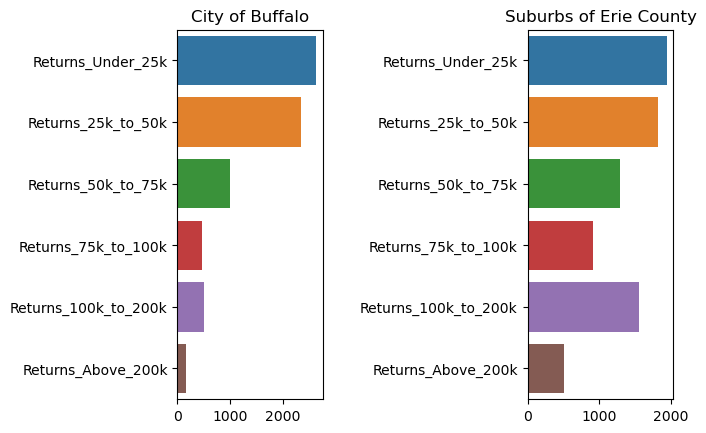

In [198]:
plt.subplot(1, 3, 1)
sns.barplot(data=query11, errorbar=None, orient='h')
plt.title("City of Buffalo")

plt.subplot(1, 3, 3)
sns.barplot(data=query12, errorbar=None, orient='h')
plt.title("Suburbs of Erie County")

#### What is the total number of returns in each zipcode?

In [200]:
sql_statement = """
    SELECT 
        Location.Zipcode,
        Location.City,
        Income_Total.No_of_Returns
    FROM Income_Total
    JOIN Location ON Income_Total.Zipcode = Location.Zipcode
    ORDER BY No_of_Returns ASC
    """
query13 = pd.read_sql_query(sql_statement, conn)

In [201]:
query13

,Zipcode,City,No_of_Returns
0,14134,SARDINA,150
1,14026,BOWMANSVILLE,450
2,14102,MARILLA,630
3,14055,EAST CONCORD,730
4,14030,CHAFFEE,750
5,14034,COLLINS,830
6,14203,BUFFALO,1040
7,14139,SOUTH WALES,1180
8,14170,WEST FALLS,1220
9,14033,COLDEN,1240


<Axes: xlabel='Zipcode'>

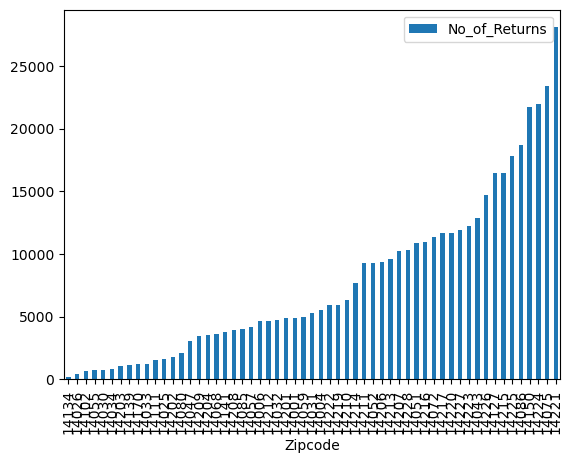

In [202]:
query13.plot.bar(x="Zipcode")

#### Is there correlation between population count and number of food stores?

In [204]:
sql_statement = """
    SELECT 
        Food_Store.Zipcode,
        COUNT(Food_Store.Store_Name) AS No_of_Stores,
        Income_Total.No_of_Returns
    FROM Food_Store
    JOIN Income_Total ON Food_Store.Zipcode = Income_Total.Zipcode
    WHERE Food_Store.Store_Focus = "Grocery"
    GROUP BY Food_Store.Zipcode
    ORDER BY No_of_Returns ASC
    """
query14 = pd.read_sql_query(sql_statement, conn)

In [205]:
query14

,Zipcode,No_of_Stores,No_of_Returns
0,14034,1,830
1,14203,1,1040
2,14111,1,1550
3,14047,1,3100
4,14209,2,3460
5,14204,1,3560
6,14141,2,3790
7,14208,4,3970
8,14057,1,4180
9,14006,2,4650


<Axes: xlabel='No_of_Returns', ylabel='No_of_Stores'>

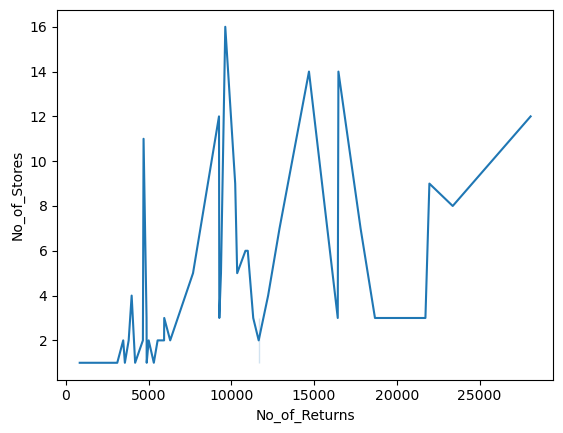

In [206]:
sns.lineplot(data=query14, x="No_of_Returns", y="No_of_Stores")